# Predict Student's Drop Out and Academic Success

### Introduction

School dropout and educational failure pose significant challenges to economic growth and societal well-being, directly impacting students, families, institutions, and the broader community. In this project, I aim to predict student dropout and academic success by developing classification models using a dataset from Portuguese institutions.

**Research questions:**

* What factors impact student dropout, and how do they do so?
* Which students need more support to prevent dropout?

By identifying key factors influencing dropout rates, I seek to inform strategies for improving student retention and overall educational outcomes.

### Data Description

The dataset contains 4,424 records with 35 attributes, where each record represents an individual student. It was compiled from several disjoint databases related to students enrolled in 17 undergraduate degrees, such as education, management and nursing. The dataset includes information known at the time of student enrollment, as well as demographic, socioeconomic, and macroeconomic data, along with students’ academic performance at the end of the first and second semesters.

**Data Source:** Valentim Realinho, Jorge Machado, Luís Baptista, and Mónica V. Martins. “Predict Students' Dropout and Academic Success”. Zenodo, December 13, 2021. https://doi.org/10.5281/zenodo.5777340.  

**Data Description:** Realinho, Valentim, Jorge Machado, Luís Baptista, and Mónica V. Martins. 2022. "Predicting Student Dropout and Academic Success" Data 7, no. 11: 146. https://doi.org/10.3390/data7110146  

**Dataset in Kaggle:** https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data


In [98]:
# %pip install pandas
# %pip install seaborn
# %pip install scipy
# %pip install scikit-learn
# %pip install statsmodels
# %pip install xgboost --no-binary xgboost -v  install from the source reference(https://github.com/dmlc/xgboost/issues/6909)
# %pip install feature_engine
# %pip install category_encoders
# %pip install imblearn
# %pip install prince

### Prepare

In [99]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
students = pd.read_csv('dataset.csv')

In [100]:
# Look into the data
students.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

The dataset contains 4424 records with 35 attributes, and no missing data.

In [101]:
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


As described in Data Description, more than 50% of the columns are categorical data, while the rest of them (e.g., variables start with 'Curricular units') are numerical.

In [102]:
students.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

There are three categories in the target variable: 'Dropout', 'Graduate', and 'Enrolled'.

### Data Cleaning

This dataset is nearly clean thanks to the rigorous data preprocessing performed by the contributors of the data ([Reference](https://www.mdpi.com/2306-5729/7/11/146)). They've addressed anomalies, outliers, and missing values.

However, a few minor cleaning steps are still needed. First, I'll modify some column names to make them more consistent and easier to work with later.

In [103]:
# Correct a column name that has a typo and replace single quotes with underscores
students.rename(columns = {"Nacionality": "Nationality", "Mother's qualification": "Mother_qualification", "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation", "Father's occupation": "Father_occupation", "Age at enrollment": "Age"}, inplace = True)

In [104]:
# Replace white space in the column names with underscore
students.columns = students.columns.str.replace(' ', '_')

In [105]:
# Remove the parenthesis
students.columns = students.columns.str.replace('(', '')
students.columns = students.columns.str.replace(')', '')

students.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age',
       'International', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Target'],


I'll change the data types of columns that should be categorical from ‘int’ to ‘category’ to ensure that classification models treat these columns as categorical data rather than numerical.

In [106]:
# Change data types of columns that should be categorical
col = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
      'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
      'International', 'Target']

students[col] = students[col].astype('category')

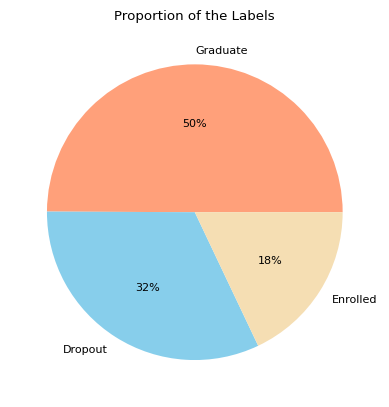

In [107]:
# Pie chart of the target variable
labels = students['Target'].value_counts().index
values = students['Target'].value_counts().values

plt.pie(values, labels = labels, colors = ['lightsalmon', 'skyblue', 'wheat'], autopct = '%1.0f%%')
plt.title('Proportion of the Labels');

From the pie chart above we can see that the data is imbalanced: with about 50% of the labels are 'Graduate', 32% are 'Dropout', and 18% are 'Enrolled'. 

The labels are string, I will encode them as ordinal data -- 0 represents 'Dropout', 1 represents 'Enrolled', and 2 represents 'Graduate' -- since most classification models only handle numeric values.

In [108]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the labels as ordinal data (0 - 'Dropout', 1 - 'Enrolled', and 2 - 'Graduate') 
students['Target_encoded'] = OrdinalEncoder(categories = [['Dropout', 'Enrolled', 'Graduate']]).fit_transform(students[['Target']])

In [109]:
# Drop 'Target' variable
students.drop('Target', axis = 1, inplace = True)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   category
 4   Daytime/evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Nationality                                   4424 non-null   category
 7   Mother_qualification                          4424 non-null   category
 8   Father_qualification                          4424 non-null   category
 9   Mother_occupation                             4424 n

**Data Cleaning Summary**

The following processes were done during data cleaning:
* Modified some column names;
* Change data types of columns that should be categorical;
* Encoded the labels as ordinal data.

I also checked the proportion of the labels, and found that the dataset is imbalanced. I will incorporate balancing steps while building the models.

**Potential Challenges**  

**1.Imbalanced Dataset**  

The imbalanced dataset could pose a potential challenge to our model's accuracy. I’m considering the following techniques to address this:
(1) Choosing classification models that can handle imbalanced data properly, such as setting the ‘class_weight’ parameter in RandomForestClassifier;
(2) Resampling: using SMOTE (Synthetic Minority Oversampling Technique) from the imbalanced-learn package to oversample the minority class by creating synthetic data;
(3) Choosing proper evaluation metrics, such as balanced accuracy and F1 score, to better evaluate the model.  

**2.Multi-class Variables**  

The categorical variables with multiple classes are encoded as numbers, with each number representing a different category and no inherent order among the categories. This could be problematic, so I need to investigate further. 

The method of representing categories by assigning unique integer values is called Label Encoding, which is usually appropriate for ordinal data. However, for nominal data, especially those with high cardinality, label encoding may not be the best choice because the model might mistakenly interpret the numerical representations of categories as having an inherent order or importance. I will closely examine these variables and try out different feature encoding methods to see how the models perform during Exploratory Data Analysis (EDA).


### Exploratory Data Analysis

There are 34 features in this dataset. I will examine their relationship with the target variable, which is a three-class categorical data. The features that have no association with the label will be the potential variables to be removed from the model building.

**Chi-Square Independence Test for Categorical Variables**

The Chi-Square independence test will be implemented to check the association between the categorical variables and the dependent variable, with the hypothesis as follows:  

$H_{0}$: the two variables are independent  
$H_{1}$: the two variables are dependent  

$\alpha$ = 0.05

I will reject the null hypothesis and accept the alternative hypothesis if the p-value is less than 0.05, meaning the two variables are dependent. If the p-value is greater than or equal to 0.05, I fail to reject the null hypothesis, meaning the two variables are independent.

In [111]:
from scipy.stats import chi2_contingency

# list of categorical features
cats = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
       'Mother_qualification', 'Father_qualification', 'Mother_occupation',
       'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'International']

# Get the p-values from Chi-Square indenpendence tests
p_value = []

for col in cats:
    crosstable = pd.crosstab(index = students[col], columns = students['Target_encoded'])
    p = chi2_contingency(crosstable)[1]
    p_value.append(p)

chi2_result = pd.DataFrame({
    'Variable': cats,
    'P_value': [round(ele, 5) for ele in p_value]
})

chi2_result = chi2_result.sort_values('P_value')

chi2_result

,Variable,P_value
0,Marital_status,0.00000
1,Application_mode,0.00000
2,Application_order,0.00000
3,Course,0.00000
4,Daytime/evening_attendance,0.00000
5,Previous_qualification,0.00000
7,Mother_qualification,0.00000
8,Father_qualification,0.00000
13,Debtor,0.00000
9,Mother_occupation,0.00000


Most of the p-values are close to zero, except for three variables ('Nationality', 'International', 'Educational_special_needs') with very high p-values (0.24, 0.53, 0.73), indicating that no statistically significant association between these three features and the label. 

Let's take a closer look at these three variables. 

In [112]:
# The cross table of 'International' and 'Nationality' columns
inter_nation = pd.crosstab(students['International'], students['Nationality'])
inter_nation

Nationality,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
International,,,,,,,,,,,,,,,,,,,,,
0,4314,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,13,3,1,1,1,2,13,5,...,14,1,38,2,3,2,3,2,1,1


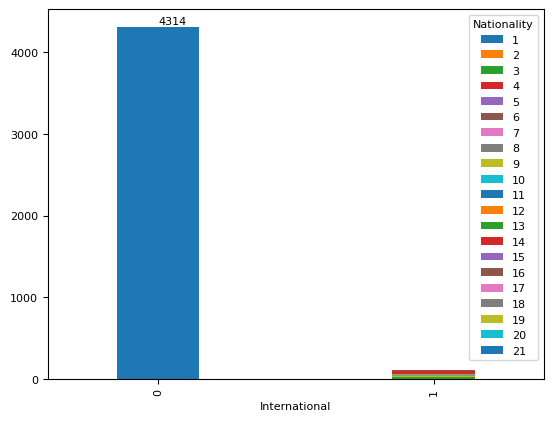

In [113]:
inter_nation.plot.bar(width = 0.3, stacked = True)
plt.text(0, 4350, str(inter_nation.iloc[0,0]));

The cross table and the plot of the 'International' and 'Nationality' variables above reveals that they are highly correlated and sparse: with 4314 out of 4424 entries (97.5%) are encoded as 0 in 'International' (meaning 'no' from the Data Description) and 1 in 'Nationality' (meaning 'Portuguese'). 

In [114]:
# Check the value count of 'Educational_special_needs' variable
students['Educational_special_needs'].value_counts()

Educational_special_needs
0    4373
1      51
Name: count, dtype: int64

'Educational special needs' data is also sparse.  Nearly 99% of the data points are represented by 0, indicating that most individuals have no reported special needs. 

Given the high p-values from Chi-Squared test (suggesting weak association with the target variable) and the data characteristics we just discovered, I will exclude these three features from the model building process.

In [115]:
stud_selected = students.drop(['Nationality', 'International', 'Educational_special_needs'], axis = 1)  

**Spearman's rank correlation between numerical features and the label**

A heatmap is used to visualize the Spearman's rank correlation between numerical features and the labels. Spearman's rank correlation measures the strength and direction of monotonic association between two variables. It can capture both linear and nonlinear monotonic relationships.

In [116]:
num_features = students[['Age',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 
       'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 
       'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 
       'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target_encoded']]

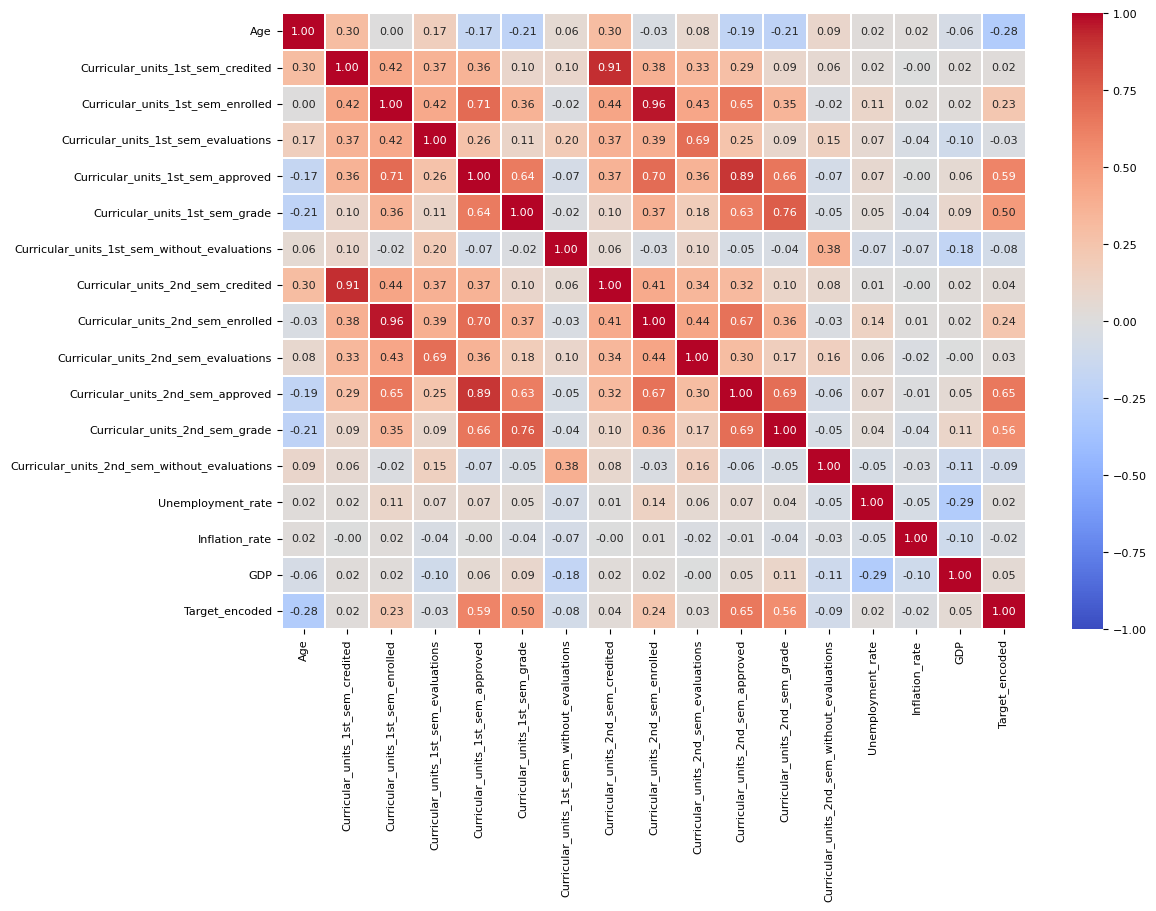

In [117]:
plt.figure(figsize = (12, 8))
plt.rcParams.update({'font.size': 8})
hm = sns.heatmap(num_features.corr(method = 'spearman'), 
                 cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths = .2, vmin = -1, vmax = 1, center = 0)

As can be seen from the heat map, there are four features ('Curricular_units_2nd_sem_approved’, 'Curricular_units_2nd_sem_grade’, ’Curricular_units_1st_sem_approved’, 'Curricular_units_1st_sem_grade’) that have relatively high and positive correlations with the label, while some have very low correlations(e.g., 'Unemployment_rate', 'Inflation_rate')

The heat map also reveals multicollinearity among the features related to curricular units. These features represent academic data from the end of the first and second semesters. I will aggregate them to get the average value between the two semesters.

In [118]:
stud_selected['curri_avg_credited'] = stud_selected[['Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited']].mean(axis = 1)
stud_selected['curri_avg_enrolled'] = stud_selected[['Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled']].mean(axis = 1)
stud_selected['curri_avg_evaluations'] = stud_selected[['Curricular_units_1st_sem_evaluations', 'Curricular_units_2nd_sem_evaluations']].mean(axis = 1)
stud_selected['curri_avg_approved'] = stud_selected[['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved']].mean(axis = 1)
stud_selected['curri_avg_grade'] = stud_selected[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].mean(axis = 1)
stud_selected['curri_avg_without_evaluations'] = stud_selected[['Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_without_evaluations']].mean(axis = 1)

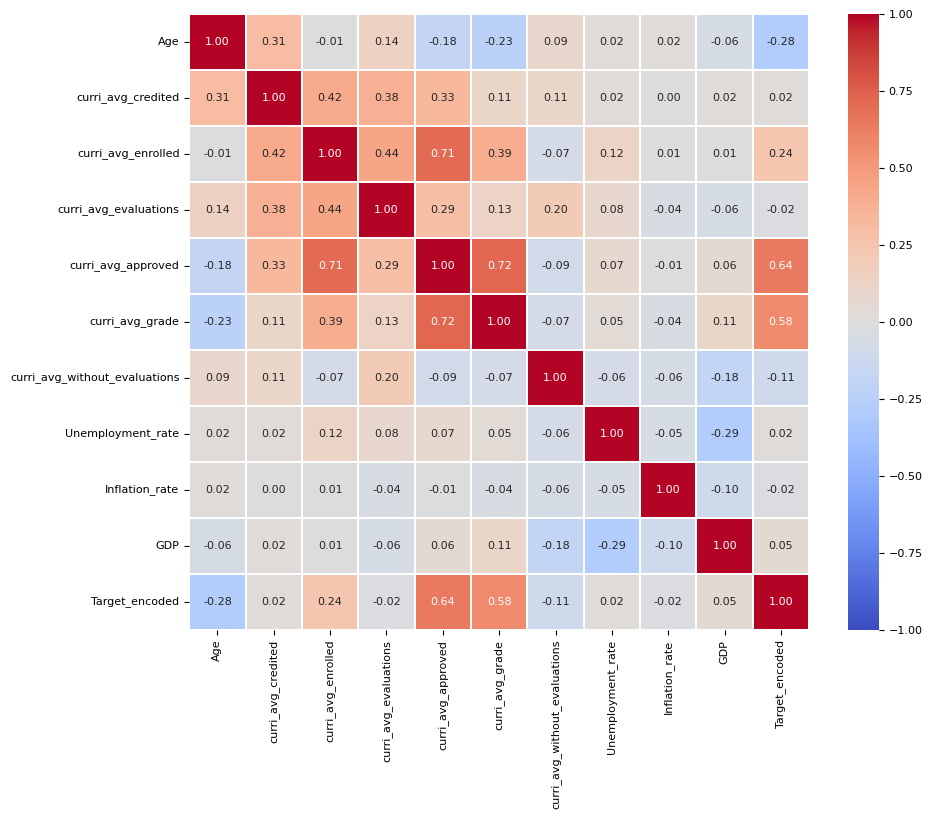

In [119]:
# plot the heat map of correlation matrix again
num_features = stud_selected[['Age', 'curri_avg_credited', 'curri_avg_enrolled', 'curri_avg_evaluations', 'curri_avg_approved',
       'curri_avg_grade', 'curri_avg_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Target_encoded']]

plt.figure(figsize = (10, 8))
plt.rcParams.update({'font.size': 8})
sns.heatmap(num_features.corr(method = 'spearman'), vmin = -1, vmax = 1, center = 0, 
            cmap = 'coolwarm', fmt = '.2f', linewidths = .2, annot = True);

The new correlation matrix above shows that 'curri_avg_approved' and 'curri_avg_grade' still have a relatively high correlation with the labels ('Target_encoded'), while 'curri_avg_credited' and 'curri_avg_evaluations', along with 'the macroeconomic data ('Unemployment_rate', 'Inflation_rate'), have very low correlations, all between -0.02 and 0.02. I will exclude these four features. 

The multicollinearity still exists among the academic data. I'll take it into account when selecting the models.

Let's check how 'curri_avg_approved' and 'curri_avg_grade' are associated with students' situation at the end of the normal duration of the course.

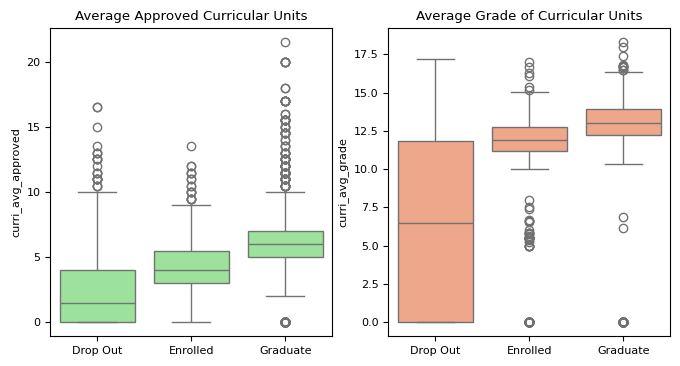

In [120]:
# Plot 'curri_avg_approved' and 'curri_avg_grade' vs. Target
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
sns.boxplot(data = stud_selected, x = 'Target_encoded', y = 'curri_avg_approved', color = 'lightgreen', ax = ax1)
ax1.set_title('Average Approved Curricular Units')
ax1.set_xlabel("")
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);

sns.boxplot(data = stud_selected, x = 'Target_encoded', y = 'curri_avg_grade', color = 'lightsalmon', ax = ax2)
ax2.set_title('Average Grade of Curricular Units')
ax2.set_xlabel("")
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Drop Out', 'Enrolled', 'Graduate']);


It's not surprising that 'Graduate' is associated with more approved curricular units and higher grades. However, there are some instances of a 0 value for average grade and average approved curricular units in the 'Graduate' class.

In [121]:
# Check the rows with zero average approved curricular units and students being graduade
stud_selected.loc[(stud_selected['curri_avg_approved'] == 0) & (stud_selected['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Unemployment_rate,Inflation_rate,GDP,Target_encoded,curri_avg_credited,curri_avg_enrolled,curri_avg_evaluations,curri_avg_approved,curri_avg_grade,curri_avg_without_evaluations
20,1,1,3,2,1,1,1,1,10,9,...,11.1,0.6,2.02,2.0,0.0,0.0,0.0,0.0,0.0,0.0
66,1,1,3,2,1,1,13,14,6,4,...,10.8,1.4,1.74,2.0,0.0,0.0,0.0,0.0,0.0,0.0
101,1,1,4,2,1,1,1,1,10,11,...,16.2,0.3,-0.92,2.0,0.0,0.0,0.0,0.0,0.0,0.0
405,1,1,1,2,1,1,1,14,4,10,...,12.7,3.7,-1.70,2.0,0.0,0.0,0.0,0.0,0.0,0.0
527,1,12,1,2,1,1,3,1,3,11,...,9.4,-0.8,-3.12,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,1,8,2,2,1,1,3,1,3,7,...,15.5,2.8,-4.06,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4291,1,1,1,2,1,1,1,28,5,6,...,15.5,2.8,-4.06,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4353,1,1,1,2,1,1,3,1,5,5,...,12.4,0.5,1.79,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4365,1,1,2,2,1,1,23,28,5,10,...,7.6,2.6,0.32,2.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 75 data points where all data related to curricular units is zero, yet the students are labeled as 'Graduate.' This contradicts common sense, so I will treat these rows as outliers and remove them from the dataset.

In [122]:
# Remove the outliers
stud_selected = stud_selected.drop(stud_selected.loc[(stud_selected['curri_avg_approved'] == 0) & (stud_selected['Target_encoded'] == 2)].index)

# Check the rows with zero average grade and students being graduade
stud_selected.loc[(stud_selected['curri_avg_grade'] == 0) & (stud_selected['Target_encoded'] == 2)]

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Unemployment_rate,Inflation_rate,GDP,Target_encoded,curri_avg_credited,curri_avg_enrolled,curri_avg_evaluations,curri_avg_approved,curri_avg_grade,curri_avg_without_evaluations


There is no rows with zero average grade and students being graduade, meaning the 0 value for average grade and average approved curricular units in the 'Graduate' class correspond to the same data points.

In [123]:
# Drop unselected features along with the features that have been aggregated into new ones 
stud_selected = stud_selected.drop(columns = ['Unemployment_rate', 'Inflation_rate', 'curri_avg_credited', 'curri_avg_evaluations', 
                                              'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 
                                              'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 
                                              'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 
                                              'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations'])

From the data description, we know that many columns in this dataset are categorical. Some are binary encoded as 0 and 1, while others are multiclass encoded as numbers, with each number representing a different category and no inherent order among the categories.

Here are the countplots of these multiclass variables.

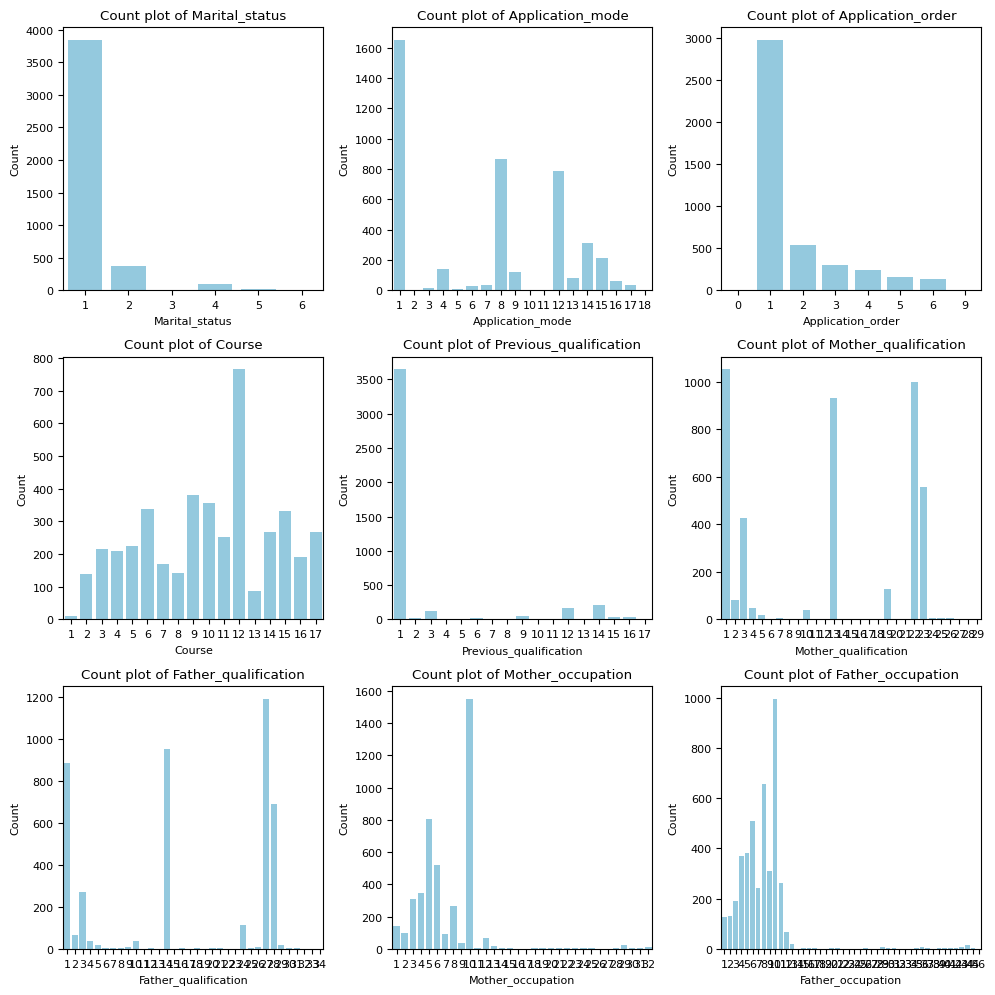

In [124]:
# Countplot of the multi-class variables
mult_vars = ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Previous_qualification', 'Mother_qualification', 'Father_qualification', 'Mother_occupation', 'Father_occupation']

fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))
axs = axs.flatten()

for i, var in enumerate(mult_vars):
    sns.countplot(x = var, data = stud_selected, ax = axs[i], color = 'skyblue')
    axs[i].set_title(f'Count plot of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


The count plots above show that most of the multi-class variables have high cardinality (e.g., 'Father_occupation' has 46 categories) and very uneven category distribution (e.g., nearly 4,000 are encoded as 1, meaning 'Single', in'Marital_status'). As I mentioned before, while each number represents a different category of the multi-class variable, there is no inherent order among these categories. This could potentially be a problem that I need to investigate further.


**Feature Engineering**

The method of representing categories by assigning unique integer values is called Label Encoding. This technique is usually appropriate for ordinal data. However, for nominal data, especially those with high cardinality, label encoding may not be the best choice because the model might mistakenly interpret the numerical representations of categories as having an inherent order or importance. To investigate how different feature encoding methods affect model performance, I will encode the multi-class categorical data in the following three ways:

* Frequency Encoding
* K-fold Target Encoding
* Sorting categories by their principal component scores (**Reference**: Coppersmith D, Hong SJ, Hosking JR. 1999. Partitioning nominal attributes in decision trees. Data Mining and Knowledge Discovery 3(2):197–217 [DOI 10.1023/a:1009869804967](https://link.springer.com/article/10.1023/A:1009869804967))

and compare the Balanced Accuracy, F1 Score, and AUC Score of the models.

In [125]:
from sklearn.model_selection import train_test_split

# Split the data into training and test set 
train, test = train_test_split(stud_selected, test_size = 0.2, stratify = stud_selected['Target_encoded'], random_state = 0)

In [126]:
# Split the training set into two parts for feature encoding and validation
tra, val = train_test_split(train, test_size = 0.2, stratify = train['Target_encoded'], random_state = 1)

# Extract features and labels 
tra_X = tra.drop('Target_encoded', axis = 1)
tra_y = tra['Target_encoded']
val_X = val.drop('Target_encoded', axis = 1)
val_y = val['Target_encoded']

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score

# Train the Random Forest on the raw training data(label encoding). 
rf = RandomForestClassifier(class_weight = 'balanced', random_state= 2)
rf.fit(tra_X, tra_y)
y_pred = rf.predict(val_X)
y_prob = rf.predict_proba(val_X)

le_accuracy = round(balanced_accuracy_score(val_y, y_pred), 4)
le_f1score = round(f1_score(val_y, y_pred, average = 'macro'), 4)
le_auc = round(roc_auc_score(val_y, y_prob, average = 'macro', multi_class = 'ovr'), 4)

print('Label Encoding performance --')
print('Balanced Accuracy: ', le_accuracy)
print('F1 Score: ', le_f1score)
print('AUC score: ', le_auc)

Label Encoding performance --
Balanced Accuracy:  0.6851
F1 Score:  0.6931
AUC score:  0.8971


In [128]:
# Frequency encoding 
from feature_engine.encoding import CountFrequencyEncoder

fe = CountFrequencyEncoder(encoding_method = 'frequency', ignore_format=True, variables = mult_vars)
fe.fit(tra)

fe_train = fe.transform(tra)
fe_test = fe.transform(val)

In [129]:
# Train a Random Forest with the frequency encoded data
fe_train_X = fe_train.drop('Target_encoded', axis = 1)
fe_train_y = fe_train['Target_encoded']
fe_test_X = fe_test.drop('Target_encoded', axis = 1)
fe_test_y = fe_test['Target_encoded']

rf = RandomForestClassifier(class_weight = 'balanced', random_state = 2)
rf.fit(fe_train_X, fe_train_y)
y_pred = rf.predict(fe_test_X)
y_prob = rf.predict_proba(fe_test_X)

fe_accuracy = round(balanced_accuracy_score(fe_test_y, y_pred), 4)
fe_f1score = round(f1_score(fe_test_y, y_pred, average = 'macro'), 4)
fe_auc = round(roc_auc_score(fe_test_y, y_prob, average = 'macro', multi_class = 'ovr'), 4)

print('Frequency Encoding perfromance --')
print('Balanced Accuracy: ', fe_accuracy)
print('F1 Score: ', fe_f1score)
print('AUC Score: ', fe_auc)
      

Frequency Encoding perfromance --
Balanced Accuracy:  0.6854
F1 Score:  0.692
AUC Score:  0.8989


The model trained by the frequency encoded multi-class variables performs slightly better than the model trained on label encoded data.

In [130]:
# K-fold target encoding to avoid data leakage. K set to be 5.
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder

# suppress future warning
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# initialize the value of the multi-class variables in the training set
te_train = tra.copy()
te_train[mult_vars] = te_train[mult_vars].astype('float')
te_train.loc[:, mult_vars] = 0.0

kf = KFold()
for train_index, test_index in kf.split(tra):
    tra_set, tes_set = tra.iloc[train_index], tra.iloc[test_index]
    for col in mult_vars:
        te = TargetEncoder(cols = col)
        te.fit(tra_set[col], tra_set['Target_encoded'])
        te_train.loc[te_train.index[test_index], col] = te.transform(tes_set[col])

Now I will use the target mean of the training set to transform multi-class variables in the test set.

In [131]:
# initialize the value of the multi-class variables in the test set
te_test = val.copy()
te_test[mult_vars] = te_test[mult_vars].astype('float')
te_test.loc[:, mult_vars] = 0.0

for col in mult_vars:
    te = TargetEncoder(cols = col)
    te.fit(tra[col], tra['Target_encoded'])
    te_test.loc[:, col] = te.transform(val[col])

In [132]:
# Train a Random Forest with the K-fold target encoded data
te_train_X = te_train.drop('Target_encoded', axis = 1)
te_train_y = te_train['Target_encoded']
te_test_X = te_test.drop('Target_encoded', axis = 1)
te_test_y = te_test['Target_encoded']

rf = RandomForestClassifier(class_weight= 'balanced', random_state = 2)
rf.fit(te_train_X, te_train_y)
y_pred = rf.predict(te_test_X)
y_prob = rf.predict_proba(te_test_X)

te_accuracy = round(balanced_accuracy_score(te_test_y, y_pred), 4)
te_f1score = round(f1_score(te_test_y, y_pred, average = 'macro'), 4)
te_auc = round(roc_auc_score(te_test_y, y_prob, average = 'macro', multi_class = 'ovr'), 4)

print('K-fold Target Encoding Performance -- ')
print('Balanced Score: ', te_accuracy)
print('F1 Score: ', te_f1score)
print('AUC Score: ', te_auc)


K-fold Target Encoding Performance -- 
Balanced Score:  0.6872
F1 Score:  0.6962
AUC Score:  0.8932


In [133]:
# Sorting categories by their principal component scores

from sklearn.decomposition import PCA

p_label = stud_selected['Target_encoded'].value_counts(normalize = True).sort_index().to_numpy()
n_totl = stud_selected.shape[0]

pc_scores = []
for col in mult_vars:
    cont_mx = pd.crosstab(stud_selected[col], stud_selected['Target_encoded'])
    prob_mx = cont_mx.div(cont_mx.sum(axis = 1), axis = 0).to_numpy()
    n_class = stud_selected[col].value_counts().to_list()
    num_cat = len(stud_selected[col].unique())
    cov_mx = np.zeros((3, 3))

    for i in range(num_cat):
        cov_i = np.dot(np.transpose(prob_mx[[i]] - p_label), (prob_mx[[i]] - p_label))
        cov_mx = np.add(cov_mx, cov_i) * n_class[i]
    cov_mx = cov_mx / (n_totl - 1)

    pca = PCA(n_components = 1).fit(cov_mx)
    first_pc = pca.components_[0]

    pc_score = []
    for i in range(num_cat):
        s = np.dot(prob_mx[i], first_pc)
        pc_score.append(s)
    

    label_sorted = pd.DataFrame({
        'original_label': np.arange(1, num_cat+1),
        'pc_score': pc_score
    })
    label_sorted = label_sorted.sort_values(by = 'pc_score')
    label_sorted['new_label'] = np.arange(1, num_cat+1)

    pc_scores.append(label_sorted)

In [134]:
# Encode multi-class variable in the training set and validation set with the new sorted categories.
tra_sorted_X = tra_X.copy()
val_sorted_X = val_X.copy()

i = 0
for col in mult_vars:
    tra_sorted_X[col] = tra_sorted_X[col].replace(pc_scores[i]['original_label'].to_list(), pc_scores[i]['new_label'].to_list())
    val_sorted_X[col] = val_sorted_X[col].replace(pc_scores[i]['original_label'].to_list(), pc_scores[i]['new_label'].to_list())
    i = i + 1

In [135]:
# Train the random forest model with the category-sorted data
rf = RandomForestClassifier(class_weight='balanced', random_state=2)
rf.fit(tra_sorted_X, tra_y)

y_pred = rf.predict(val_sorted_X)
y_prob = rf.predict_proba(val_sorted_X)

sc_accuracy = round(balanced_accuracy_score(val_y, y_pred), 4)
sc_f1score = round(f1_score(val_y, y_pred, average = 'macro'), 4)
sc_auc = round(roc_auc_score(val_y, y_prob, average = 'macro', multi_class = 'ovr'), 4)

print('Sorting Categories Performance -- ')
print('Balanced Score: ', sc_accuracy)
print('F1 Score: ', sc_f1score)
print('AUC Score: ', sc_auc)


Sorting Categories Performance -- 
Balanced Score:  0.6867
F1 Score:  0.6954
AUC Score:  0.8988


In [136]:
# Put the three model performance together 
pd.DataFrame({
    'Encoding Method': ['Label Encoding', 'Frequency Encoding', 'K-fold Target Encoding', 'Sorting Category'],
    'Balanced Accuracy': [le_accuracy, fe_accuracy, te_accuracy, sc_accuracy],
    'F1 Score': [le_f1score, fe_f1score, te_f1score, sc_f1score],
    'AUC score': [le_auc, fe_auc, te_auc, sc_auc]
})

,Encoding Method,Balanced Accuracy,F1 Score,AUC score
0,Label Encoding,0.6851,0.6931,0.8971
1,Frequency Encoding,0.6854,0.6920,0.8989
2,K-fold Target Encoding,0.6872,0.6962,0.8932
3,Sorting Category,0.6867,0.6954,0.8988


As we can see from the table above, the performance of the models trained on data encoded with different methods is very similar in terms of the three metrics (balanced accuracy, F1 score, and AUC). This suggests that the encoding methods do not significantly affect model performance. It may also suggest that the multi-class variables we encoded are not important in the model. I will explore feature importance further.

**Feature Importance**

Since the model performance is similar across different encoding methods, I will use the original training set (label encoding) to explore feature importance. Additionally, I choose permutation importance over the built-in feature importance in Random Forest because impurity-based importance can be biased towards high cardinality features (typically numerical features) over low cardinality features (such as binary features). In contrast, permutation importance does not exhibit such a bias, which is beneficial for our dataset as it contains both numerical and binary features. 

In [137]:
# Train the random forest with the original training set (label encoding)
rf = RandomForestClassifier(class_weight = 'balanced', random_state = 2)
rf.fit(tra_X, tra_y)

RandomForestClassifier(class_weight='balanced', random_state=2)

In [138]:
from sklearn.inspection import permutation_importance

# Get permutation importance
rf_perm_scores = permutation_importance(rf, val_X, val_y, n_repeats = 10, random_state = 16)

rf_perm_imp = pd.DataFrame({'Features': tra_X.columns,
                            'Importance': rf_perm_scores.importances_mean})

rf_perm_imp = rf_perm_imp.sort_values(by = 'Importance', ascending = False)
rf_perm_imp

,Features,Importance
18,curri_avg_approved,1.951149e-01
19,curri_avg_grade,4.655172e-02
12,Tuition_fees_up_to_date,3.117816e-02
15,Age,7.471264e-03
11,Debtor,5.747126e-03
2,Application_order,4.310345e-03
8,Mother_occupation,4.310345e-04
14,Scholarship_holder,4.310345e-04
4,Daytime/evening_attendance,-2.220446e-17
5,Previous_qualification,-2.873563e-04


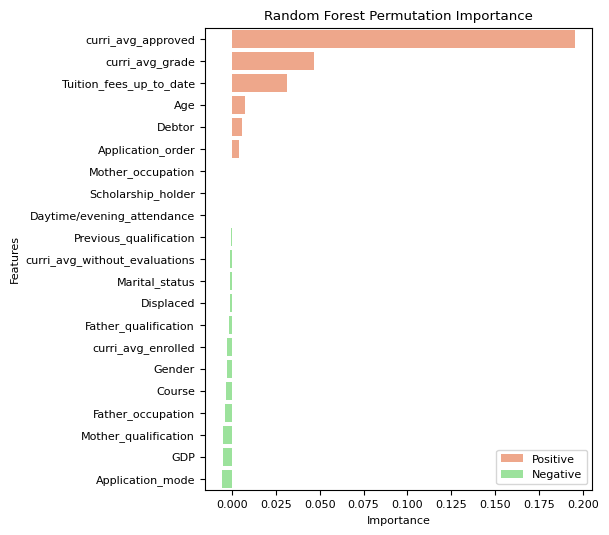

In [139]:
# Plot the feature importance results
plt.figure(figsize = (5, 6))
colors = ['Positive' if c >= 0 else 'Negative' for c in rf_perm_imp['Importance']]
sns.barplot(data = rf_perm_imp, x = 'Importance', y = 'Features', hue = colors, palette = {'Positive':'lightsalmon', 'Negative':'lightgreen'})
plt.title('Random Forest Permutation Importance');

As we can see from the 'Random Forest Permutation Importance' plot above, all multi-class variables scored negatively or close to zero.

Permutation importance measures the contribution of each feature to a fitted model by randomly shuffling the values of a single feature and observing the resulting degradation of the model's score. A negative value means the predictions on the shuffled data happened to be more accurate than on the real data. "This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. [(Cite from this Kaggle tutorial)](https://www.kaggle.com/code/dansbecker/permutation-importance)"

This explains why different encoding methods for the multi-class variables do not significantly affect the Random Forest model's performance. However, since I haven't tuned the hyperparameters in the Random Forest model, the model performance and feature importance ranking might not be optimal yet. I will keep the features as they are for now.

**EDA Summary**

Here's what I did during the Exploratory Data Analysis (EDA):

* Examined the relationships between features and labels, and removed features which has no statistically significant association with the label;
* Discovered and removed 75 outliers when examining how the curricular data influence students' status;
* Aggregated academic data to mitigate the multicollinearity problem and retain interpretability;
* Explored different feature encoding methods on all multi-class features, and found that these methods didn't affect model performance much;
* Explored feature importance using permutation importance on Random Forest, and found some features(mostly multi-class variables) scored negatively;

By the end of the EDA, there are 21 features and a label of three classes in the dataset. **Potential challenges** include the multicollinearity problem, which will be considered during model selection.


### Models

**Model Choosing**  

Based on the dataset characteristics—multiclass classification, approximately 50% categorical data, imbalanced classes, and multicollinearity—Random Forest and XGBoost are strong candidate models. They are known to handle these characteristics well and can achieve good performance on similar problems:

* For the issue of imbalanced classes, the ‘class_weight’ parameter in RandomForestClassifier and the ‘sample_weight’ parameter in XGBClassifier are useful for adjusting weights inversely proportional to class frequencies in the input data, thereby balancing the models' bias.  

* For the multicollinearity problem, both Random Forest and XGBoost are capable of handling it relatively well. Random Forest uses multiple decision trees, each trained on a random subset of features. This randomness helps reduce the impact of multicollinearity because not all features are used in every tree. XGBoost builds trees sequentially, with each new tree correcting the errors of the previous ones, and includes regularization techniques (like L1 and L2 regularization) that help manage multicollinearity by shrinking the coefficients of less important features. 


I will train the Random Forest and XGBoost models separately, tune their hyperparameters, combine the two best-performing models using VotingClassifier, and see if this further improves performance.

**Evaluation Metrics**  

Due to the imbalanced nature of the dataset, I will employ Balanced Accuracy (the average recall obtained for each class), F1-score  (the harmonic mean of precision and recall), and AUC (the area under the ROC curve, which plots True Positive Rate against False Positive Rate) as evaluation metrics.   

Balanced Accuracy addresses class imbalance directly, while F1-score and AUC provide comprehensive assessments of precision, recall, and overall model performance across different classification thresholds.

**First Iteration of Modeling (21 features, 3-class label)**   

First, I will train a Random Forest model on the whole training set (80% of the whole dataset), and get a baseline performance on the test set.

In [140]:
# Extract features and labels
train_features = train.drop('Target_encoded', axis = 1)
train_labels = train['Target_encoded']
test_features = test.drop('Target_encoded', axis = 1)
test_labels = test['Target_encoded']

In [141]:
# Train random forest on the training set, set 'class_weight' as 'balanced' to adjust weights of our imbalanced data.
rf_base = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
rf_base.fit(train_features, train_labels)

y_pred = rf_base.predict(test_features)
y_prob = rf_base.predict_proba(test_features)

rf_base_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)
rf_base_f1score = round(f1_score(test_labels, y_pred, average = 'macro'), 3)
rf_base_auc = round(roc_auc_score(test_labels, y_prob, average = 'macro', multi_class = 'ovr'), 3)

print('Random Forest Baseline Performance:')
print('Balanced Accuracy:', rf_base_accuracy)
print('F1 Score:', rf_base_f1score)
print('AUC score:', rf_base_auc)

Random Forest Baseline Performance:
Balanced Accuracy: 0.684
F1 Score: 0.692
AUC score: 0.896


Now, I will tune the hyperparameters using RandomizedSearchCV with the default 5-fold cross validation and get the performance of the best estimator.

In [142]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
parm = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 5],
    'max_samples': [0.5, 0.75, 1]
}

# Search for best hyperparameters combination
rsv_rf = RandomizedSearchCV( estimator = RandomForestClassifier(class_weight = 'balanced', random_state = 42),
                      param_distributions = parm, n_iter = 30, scoring = 'balanced_accuracy', n_jobs = -1,  random_state = 0)

rsv_rf.fit(train_features, train_labels)  

# Get the best estimator
tuned_rf = rsv_rf.best_estimator_

# Check the model performance
y_pred = tuned_rf.predict(test_features)
y_prob = tuned_rf.predict_proba(test_features)

tuned_rf_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)
tuned_rf_f1score = round(f1_score(test_labels, y_pred, average = 'macro'), 3)
tuned_rf_auc = round(roc_auc_score(test_labels, y_prob, average = 'macro', multi_class = 'ovr'), 3)

print('Tuned Random Forest Performance:')
print('Balanced Accuracy:', tuned_rf_accuracy)
print('F1 Score:', tuned_rf_f1score)
print('AUC score:', tuned_rf_auc)

Tuned Random Forest Performance:
Balanced Accuracy: 0.727
F1 Score: 0.732
AUC score: 0.896


Now, I will train XGBClassifier on the training set to get a baseline performance of XGB model.

In [143]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Train XGBClassifier on the training set with sample_weight adjusted
sample_weights = compute_sample_weight(class_weight='balanced', y = train_labels)
xgb_base = XGBClassifier(enable_categorical = True, objective = 'multi:softmax', num_class = 3, random_state = 42)
xgb_base.fit(train_features, train_labels, sample_weight=sample_weights)

y_pred = xgb_base.predict(test_features)
y_prob = xgb_base.predict_proba(test_features)

xgb_base_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)
xgb_base_f1score = round(f1_score(test_labels, y_pred, average = 'macro'), 3)
xgb_base_auc = round(roc_auc_score(test_labels, y_prob, average = 'macro', multi_class = 'ovr'), 3)

print('XGBoost baseline performance:')
print('Balanced accuracy:', xgb_base_accuracy)
print('F1 score:', xgb_base_f1score)
print('AUC score:', xgb_base_auc)

XGBoost baseline performance:
Balanced accuracy: 0.75
F1 score: 0.757
AUC score: 0.896


In [144]:
# Tune the hyperparameters of XGBClassifier
param = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 7],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.5, 0.8]
}

rsv_xgb = RandomizedSearchCV(estimator = XGBClassifier(enable_categorical = True, objective = 'multi:softmax', num_class = 3, random_state = 42),
                       param_distributions = param, n_iter= 50, scoring = 'balanced_accuracy', n_jobs = -1, random_state = 1)

rsv_xgb.fit(train_features, train_labels, sample_weight=sample_weights)

# Get the best_estimator
tuned_xgb = rsv_xgb.best_estimator_

# Check the model performance
y_pred = tuned_xgb.predict(test_features)
y_prob = tuned_xgb.predict_proba(test_features)

tuned_xgb_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)
tuned_xgb_f1score = round(f1_score(test_labels, y_pred, average = 'macro'), 3)
tuned_xgb_auc = round(roc_auc_score(test_labels, y_prob, average = 'macro', multi_class = 'ovr'), 3)

print('Tuned XGBoost performance:')
print('Balanced accuracy:', tuned_xgb_accuracy)
print('F1 score:', tuned_xgb_f1score)
print('AUC score:', tuned_xgb_auc)

Tuned XGBoost performance:
Balanced accuracy: 0.731
F1 score: 0.727
AUC score: 0.901


The tuned_rf_ model performs a bit better than the rf_base, while tuned_xgb model doesn't improve after hyperparameter tuning. 

I'll combine the two better models and see if it improves the performance.

In [145]:
from sklearn.ensemble import VotingClassifier

# Combine tuned models by VotingClassifier
vc_soft = VotingClassifier(estimators = [('rf', tuned_rf), ('xgb', xgb_base)], voting = 'soft')
vc_soft.fit(train_features, train_labels)

y_pred = vc_soft.predict(test_features)
y_prob = vc_soft.predict_proba(test_features)

vc_soft_accuracy = round(balanced_accuracy_score(test_labels, y_pred), 3)
vc_soft_f1score = round(f1_score(test_labels, y_pred, average = 'macro'), 3)
vc_soft_auc = round(roc_auc_score(test_labels, y_prob, average = 'macro', multi_class = 'ovr'), 3)

print('vc_soft performance:')
print('Balanced accuracy:', vc_soft_accuracy)
print('F1 score:', vc_soft_f1score)
print('AUC score:', vc_soft_auc)

vc_soft performance:
Balanced accuracy: 0.747
F1 score: 0.757
AUC score: 0.907


In [146]:
# Create a dataframe 'performance' to hold the performance results of all five models
performance = pd.DataFrame({
            'Model': ['rf_base', 'tuned_rf', 'xgb_base', 'tuned_xgb', 'vc_soft'],
            'Balanced Accuracy': [rf_base_accuracy, tuned_rf_accuracy, xgb_base_accuracy, tuned_xgb_accuracy, vc_soft_accuracy],
            'F1 Score': [rf_base_f1score, tuned_rf_f1score, xgb_base_f1score, tuned_xgb_f1score, vc_soft_f1score],
            'AUC': [rf_base_auc, tuned_rf_auc, xgb_base_auc, tuned_xgb_auc, vc_soft_auc]
            })

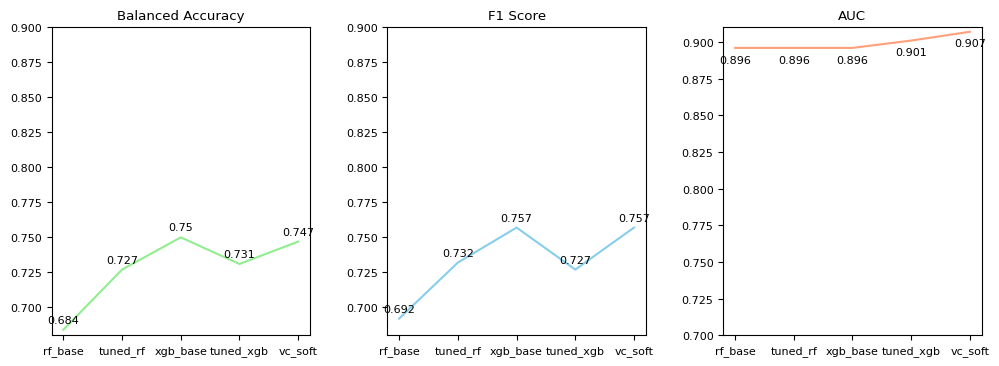

In [147]:
# Plot the performance of all five models
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
plt.subplots_adjust(wspace = 0.3)

# Extract x-ticks and model names
x_ticks = range(len(performance['Model']))
models = performance['Model'].to_list()

# Plot Balanced Accuracy
axs[0].plot(x_ticks, performance['Balanced Accuracy'], linestyle = '-', color = 'lightgreen')
axs[0].set_title('Balanced Accuracy')
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(models)
axs[0].set_ylim(0.68, 0.9)
y1 = performance['Balanced Accuracy'].to_list()
for i, y in enumerate(y1):
    axs[0].text(i, y+0.005, f'{y}', ha = 'center')

# Plot F1 Score
axs[1].plot(x_ticks, performance['F1 Score'], linestyle = '-', color = 'skyblue')
axs[1].set_title('F1 Score')
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(models)
axs[1].set_ylim(0.68,0.9)
y2 = performance['F1 Score'].to_list()
for i, y in enumerate(y2):
    axs[1].text(i, y+0.005, f'{y}', ha = 'center')

# Plot AUC Score
axs[2].plot(x_ticks, performance['AUC'], linestyle = '-', color = 'lightsalmon')
axs[2].set_title('AUC')
axs[2].set_xticks(x_ticks)
axs[2].set_xticklabels(models)
axs[2].set_ylim(0.70, 0.91)
y3 = performance['AUC'].to_list()
for i, y in enumerate(y3):
    axs[2].text(i, y-0.01, f'{y}', ha = 'center')

From the performance plots above, we can see that 'xgb_base' and 'vc_soft' perform better than the others. The performance of these two models is very close: they have the same F1 score; 'xgb_base' performs a bit better in balanced accuracy, and 'vc_soft' performs a bit better in AUC.

It's also noticeable that the AUC scores in all models are much higher than the balanced accuracy and F1 score. This may indicate a potential issue with the model's ability to predict a certain class accurately.

Let's check the confusion matrix of 'xgb_base' and see what we can find.

In [148]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(test_labels, xgb_base.predict(test_features)))

,0,1,2
0,224,33,27
1,29,86,44
2,10,24,393


It looks like the model is better at distinguishing between classes 0 and 2 but is less accurate in distinguishing between classes 1 and 2, or 1 and 0. This makes sense because class 0 represents 'Dropout,' class 2 represents 'Graduate,' and class 1 represents 'Enrolled,' which is an intermediate state that can transition to either 'Dropout' or 'Graduate' later. In this sense, the intermediate state may introduce noise to the model and affect its performance.

**Second Iteration of Modeling (21 features, binary label)**  

**Binary Classification Models**

What if I care more about whether a student will drop out to determine who needs support? Will a binary classification model with only two labels, 'Dropout' and 'Graduate', perform better and provide new insights?

I will remove the intermediate class ('Enrolled') and train Random Forest and XGBClassifier on the training set with binary labels (1 for 'Dropout' and 0 for 'Graduate'). Then, I will tune the hyperparameters and combine the best models using VotingClassifier to determine which model performs best, similar to what I did in the first iteration of modeling.

In [149]:
# Remove rows of class-1 (enrolled) from training and test set
train_bi = train.drop(train[train['Target_encoded']==1].index)
test_bi = test.drop(test[test['Target_encoded']==1].index)

# Set the target label as 1 - 'Dropout', 0 - 'Graduate'
train_bi['Target_encoded'] = train_bi['Target_encoded'].replace([0, 2], [1, 0])
test_bi['Target_encoded'] = test_bi['Target_encoded'].replace([0, 2], [1, 0])

In [150]:
# Extract features and labels
train_bi_X = train_bi.drop('Target_encoded', axis = 1)
train_bi_y = train_bi['Target_encoded']
test_bi_X = test_bi.drop('Target_encoded', axis = 1)
test_bi_y = test_bi['Target_encoded']

In [151]:
# Train Random Forst on the training set
rf_bi = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
rf_bi.fit(train_bi_X, train_bi_y)

y_pred = rf_bi.predict(test_bi_X)
y_prob = rf_bi.predict_proba(test_bi_X)

rf_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
rf_bi_f1score = round(f1_score(test_bi_y, y_pred), 3)
rf_bi_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('Random Forest Baseline Performance:')
print('Balanced Accuracy:', rf_bi_accuracy)
print('F1 Score:', rf_bi_f1score)
print('AUC score:', rf_bi_auc)

Random Forest Baseline Performance:
Balanced Accuracy: 0.914
F1 Score: 0.903
AUC score: 0.952


In [152]:
# Tune hyperparameter of Random Forest
parm = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 3, 5],
    'max_samples': [0.5, 0.75, 1]
}

# Search for best hyperparameters combination
rsv_rf_bi = RandomizedSearchCV( estimator = RandomForestClassifier(class_weight = 'balanced', random_state = 42),
                      param_distributions = parm, scoring = 'balanced_accuracy', n_iter = 30, n_jobs = -1,  random_state = 0)

rsv_rf_bi.fit(train_bi_X, train_bi_y)  

# Get the best estimator
tuned_rf_bi = rsv_rf_bi.best_estimator_

# Check the model performance
y_pred = tuned_rf_bi.predict(test_bi_X)
y_prob = tuned_rf_bi.predict_proba(test_bi_X)

tuned_rf_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
tuned_rf_bi_f1score = round(f1_score(test_bi_y, y_pred), 3)
tuned_rf_bi_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('tuned_rf_bi Performance:')
print('Balanced Accuracy:', tuned_rf_bi_accuracy)
print('F1 Score:', tuned_rf_bi_f1score)
print('AUC score:', tuned_rf_bi_auc)

tuned_rf_bi Performance:
Balanced Accuracy: 0.917
F1 Score: 0.906
AUC score: 0.956


In [153]:
# Train XGBClassifier
neg_num = sum(train_bi_y == 0)
pos_num = sum(train_bi_y == 1)
weight = neg_num / pos_num

xgb_bi = XGBClassifier(enable_categorical = True, scale_pos_weight = weight, importance_type = 'gain', random_state = 42)
xgb_bi.fit(train_bi_X, train_bi_y)

y_pred = xgb_bi.predict(test_bi_X)
y_prob = xgb_bi.predict_proba(test_bi_X)

xgb_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
xgb_bi_f1score = round(f1_score(test_bi_y, y_pred), 3)
xgb_bi_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('xgb_bi performance:')
print('Balanced accuracy:', xgb_bi_accuracy)
print('F1 score:', xgb_bi_f1score)
print('AUC score:', xgb_bi_auc)

xgb_bi performance:
Balanced accuracy: 0.923
F1 score: 0.911
AUC score: 0.956


In [154]:
# Tune the hyperparameters of XGBClassifier
param = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 8],
    'min_child_weight': [1, 5, 7],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.5, 0.8]
}

rsv_xgb_bi = RandomizedSearchCV(estimator = XGBClassifier(enable_categorical = True, scale_pos_weight = weight, random_state = 42),
                       param_distributions = param, n_iter= 50, scoring = 'balanced_accuracy', n_jobs = -1, random_state = 6)

rsv_xgb_bi.fit(train_bi_X, train_bi_y)

# Extract best estimator
tuned_xgb_bi = rsv_xgb_bi.best_estimator_

# Check 'tuned_xgb_bi' performance
y_pred = tuned_xgb_bi.predict(test_bi_X)
y_prob = tuned_xgb_bi.predict_proba(test_bi_X)

tuned_xgb_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
tuned_xgb_bi_f1score = round(f1_score(test_bi_y, y_pred), 3)
tuned_xgb_bi_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('tuned_xgb_bi performance:')
print('Balanced accuracy:', tuned_xgb_bi_accuracy)
print('F1 score:', tuned_xgb_bi_f1score)
print('AUC score:', tuned_xgb_bi_auc)

tuned_xgb_bi performance:
Balanced accuracy: 0.921
F1 score: 0.908
AUC score: 0.962


In [155]:
# Combine best models into VotingClassifer 
vc_soft_bi = VotingClassifier(estimators = [('rf', tuned_rf_bi), ('xgb', xgb_bi)], voting = 'soft')
vc_soft_bi.fit(train_bi_X, train_bi_y)

y_pred = vc_soft_bi.predict(test_bi_X)
y_prob = vc_soft_bi.predict_proba(test_bi_X)

vc_soft_bi_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
vc_soft_bi_f1score = round(f1_score(test_bi_y, y_pred), 3)
vc_soft_bi_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('vc_soft_bi performance:')
print('Balanced accuracy:', vc_soft_bi_accuracy)
print('F1 score:', vc_soft_bi_f1score)
print('AUC score:', vc_soft_bi_auc)


vc_soft_bi performance:
Balanced accuracy: 0.921
F1 score: 0.91
AUC score: 0.959


In [156]:
# Compare model performance  
pd.DataFrame({
            'Model': ['rf_bi', 'tuned_rf_bi', 'xgb_bi', 'tuned_xgb_bi', 'vc_soft_bi'],
            'Balanced Accuracy': [rf_bi_accuracy, tuned_rf_bi_accuracy, xgb_bi_accuracy, tuned_xgb_bi_accuracy, vc_soft_bi_accuracy],
            'F1 Score': [rf_bi_f1score, tuned_rf_bi_f1score, xgb_bi_f1score, tuned_xgb_bi_f1score, vc_soft_bi_f1score],
            'AUC': [rf_bi_auc, tuned_rf_bi_auc, xgb_bi_auc, tuned_xgb_bi_auc, vc_soft_bi_auc]
            })

,Model,Balanced Accuracy,F1 Score,AUC
0,rf_bi,0.914,0.903,0.952
1,tuned_rf_bi,0.917,0.906,0.956
2,xgb_bi,0.923,0.911,0.956
3,tuned_xgb_bi,0.921,0.908,0.962
4,vc_soft_bi,0.921,0.910,0.959


The performance of the five binary classification models is much better than all 3-classes models before. 

'xgb_bi' and 'vc_soft_bi' performs better than the other models again, and their performances are also very close: 'xgb_bi' performs slightly better than vc_soft_bi' in terms of balanced accuracy and F1 score, but it's AUC is a bit lower than that of 'vc_soft_bi'.

The hyperparameter tuning of the XGBoost didn't bring any improvement to the models, probably because I only set the number of iterations to 50 in the RandomizedSearchCV for efficiency, so it didn't reach the truly optimized parameter settings.  
  


**Feature Importance of 'vc_soft_bi'**  

Let's check the feature importance of 'vc_soft_bi' to see if there is any insignificant feature that we can remove. Since this VotingClassifier is combined by two models, a Random Forest model 'tuned_rf_bi' and a XGBClassifier model 'xbg_bi', I will get the feature importance scores from the two models' built-in functions and the permutation importance score of the combined model 'vc_soft_bi', then average them to get a mean importance score of all features. 

In [157]:
# Calculate feature importance
score_1 = rf_bi.feature_importances_
score_2 = xgb_bi.feature_importances_
score_3 = permutation_importance(vc_soft_bi, test_bi_X, test_bi_y, n_repeats = 10, random_state = 16).importances_mean

The scale of the two built-in feature importances and the permutation importance are different, with the first two summing to 1, and the third only summing to 0.46. I will normalize the third score to sum to 1 so that all three importance scores share the same scale.

In [158]:
# Normalizing score_3 to sum to 1
score_3[score_3 < 0] = 0
score_3 = score_3 / np.sum(score_3)

# Calculate importance ratio and cumulative sum of the ratio
feature_imp = pd.DataFrame({'Features': test_bi_X.columns,
                            'Importance': (score_1 + score_2 + score_3) / 3 
})
feature_imp = feature_imp.sort_values(by = 'Importance', ascending = False)
feature_imp['Imp_ratio'] = feature_imp['Importance'] / feature_imp['Importance'].sum()
feature_imp['cum_ratio'] = feature_imp['Imp_ratio'].cumsum()
feature_imp

,Features,Importance,Imp_ratio,cum_ratio
18,curri_avg_approved,0.466424,0.466424,0.466424
12,Tuition_fees_up_to_date,0.118044,0.118044,0.584468
19,curri_avg_grade,0.094738,0.094738,0.679206
17,curri_avg_enrolled,0.043771,0.043771,0.722978
3,Course,0.040823,0.040823,0.763801
15,Age,0.028124,0.028124,0.791925
11,Debtor,0.023917,0.023917,0.815842
14,Scholarship_holder,0.021878,0.021878,0.837720
9,Father_occupation,0.018114,0.018114,0.855835
1,Application_mode,0.017860,0.017860,0.873695


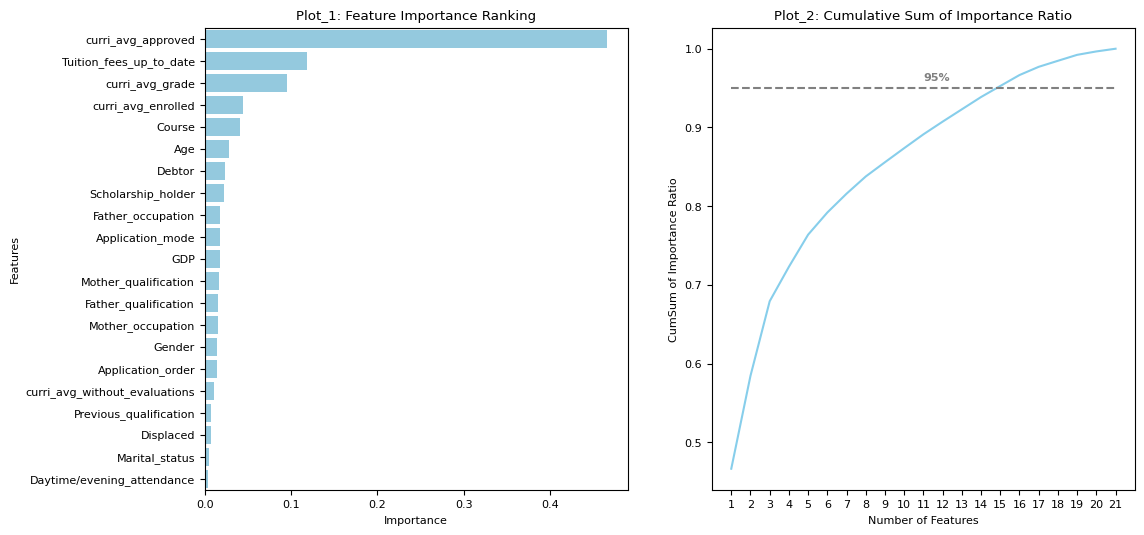

In [159]:
# Plot feature importance ranking and cumulative sum of importance ratio
n = len(feature_imp)

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
ax1 = sns.barplot(data = feature_imp, x = 'Importance', y = 'Features', color = 'skyblue', ax = ax1)
ax1.set_title('Plot_1: Feature Importance Ranking')

ax2.plot(range(1, n+1), feature_imp['cum_ratio'], color = 'skyblue')
ax2.plot(range(1, n+1), np.repeat(0.95, n), color = 'grey', linestyle = 'dashed')
ax2.text(11, 0.96, '95%', color = 'grey', fontweight = 'bold')
ax2.set_title('Plot_2: Cumulative Sum of Importance Ratio')
ax2.set_xlabel('Number of Features')
ax2.set_ylabel('CumSum of Importance Ratio')
ax2.set_xticks(range(1, len(feature_imp)+1), range(1, len(feature_imp)+1));

Plot_1 shows the ranking of feature importance, while Plot_2 shows the cumulative sum of importance ratios from the first to the last feature in the ranking. Clearly, not all features are equally important, with some contributing very little based on the average importance score. The gray dashed line in Plot_2 indicates when the cumulative sum of importance ratios reaches 95% of the total importance, which corresponds to 15 features. 

The 15th feature is 'Gender,' and according to Plot_1, its importance score is nearly identical to that of 'Application_order,' the 16th feature, indicating that these two features are almost equal in importance.

I will remove the last five features and keep the first 16 to retrain the model.


**Third Iteration of Modeling (16 features, binary label)**

In [160]:
# Remove the last five features from the training and test set
least_imp = feature_imp['Features'][-5:].to_list()
train_16X = train_bi_X.drop(columns = least_imp)
test_16X = test_bi_X.drop(columns = least_imp)

In [161]:
# Train Random forest with 16 features
rf_b16 = RandomForestClassifier(class_weight = 'balanced', random_state = 48)

rf_b16.fit(train_16X, train_bi_y)

y_pred = rf_b16.predict(test_16X)
y_prob = rf_b16.predict_proba(test_16X)

rf_b16_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
rf_b16_f1score = round(f1_score(test_bi_y, y_pred), 3)
rf_b16_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('rf_b16 Performance:')
print('Balanced Accuracy:', rf_b16_accuracy)
print('F1 Score:', rf_b16_f1score)
print('AUC score:', rf_b16_auc)

rf_b16 Performance:
Balanced Accuracy: 0.919
F1 Score: 0.91
AUC score: 0.955


In [162]:
# Train XGBClassifier with 16 features
xgb_b16 = XGBClassifier(enable_categorical = True, scale_pos_weight = 1.65, importance_type = 'gain', random_state = 48)
xgb_b16.fit(train_16X, train_bi_y)

y_pred = xgb_b16.predict(test_16X)
y_prob = xgb_b16.predict_proba(test_16X)

xgb_b16_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
xgb_b16_f1score = round(f1_score(test_bi_y, y_pred), 3)
xgb_b16_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('xgb_b16 performance:')
print('Balanced accuracy:', xgb_b16_accuracy)
print('F1 score:', xgb_b16_f1score)
print('AUC score:', xgb_b16_auc)

xgb_b16 performance:
Balanced accuracy: 0.924
F1 score: 0.913
AUC score: 0.958


In [163]:
# Combine the two models into VotingClassifier
vc_b16 = VotingClassifier(estimators = [('rf', rf_b16), ('xgb', xgb_b16)], voting = 'soft')

vc_b16.fit(train_16X, train_bi_y)

y_pred = vc_b16.predict(test_16X)
y_prob = vc_b16.predict_proba(test_16X)

vc_b16_accuracy = round(balanced_accuracy_score(test_bi_y, y_pred), 3)
vc_b16_f1score = round(f1_score(test_bi_y, y_pred), 3)
vc_b16_auc = round(roc_auc_score(test_bi_y, y_prob[:, 1]), 3)

print('vc_b16 performance:')
print('Balanced accuracy:', vc_b16_accuracy)
print('F1 score:', vc_b16_f1score)
print('AUC score:', vc_b16_auc)


vc_b16 performance:
Balanced accuracy: 0.93
F1 score: 0.921
AUC score: 0.959


In [164]:
pd.DataFrame({
    'Model': ['rf_b16', 'xgb_b16', 'vc_b16'],
    'Balanced Accuracy': [rf_b16_accuracy, xgb_b16_accuracy, vc_b16_accuracy],
    'F1 Score': [rf_b16_f1score, xgb_b16_f1score, vc_b16_f1score],
    'AUC': [rf_b16_auc, xgb_b16_auc, vc_b16_auc]
})

,Model,Balanced Accuracy,F1 Score,AUC
0,rf_b16,0.919,0.910,0.955
1,xgb_b16,0.924,0.913,0.958
2,vc_b16,0.930,0.921,0.959


The Voting Classifier 'vc_b16' achieved a balanced accuracy of 0.93, an F1 score of 0.921 and an AUC score of 0.959, making it the best model among all those we've built.  

### Results and Analysis  

Let's put the performance of the best model in each iteration together and visualize the results.

In [165]:
# Create a dataframe for the performance of the best model in each iteration
results = pd.DataFrame({
    'Models': ['vc_soft', 'vc_soft_bi', 'vc_b16', 'vc_soft', 'vc_soft_bi', 'vc_b16', 'vc_soft', 'vc_soft_bi', 'vc_b16'],
    'Metrics': ['Balanced Accuracy', 'Balanced Accuracy', 'Balanced Accuracy', 'F1 Score', 'F1 Score', 'F1 Score', 'AUC', 'AUC', 'AUC'],
    'Performance': [vc_soft_accuracy, vc_soft_bi_accuracy, vc_b16_accuracy, vc_soft_f1score, vc_soft_bi_f1score, vc_b16_f1score, vc_soft_auc, vc_soft_bi_auc, vc_b16_auc]
})

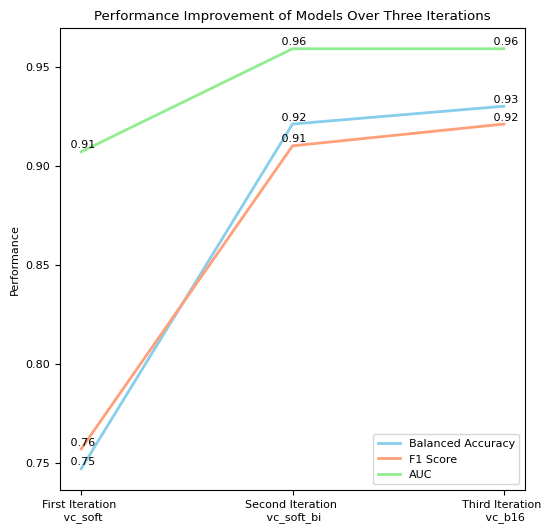

In [166]:
# Visualize the performance improvement of models over three iterations
plt.figure(figsize = (6, 6))
xticks = range(len(results['Models'].unique()))
mods = ['First Iteration \n vc_soft', 'Second Iteration \n vc_soft_bi', 'Third Iteration \n vc_b16']
ax = sns.lineplot(data = results, x = 'Models', y = 'Performance', hue = 'Metrics', palette = ['skyblue', 'lightsalmon', 'lightgreen'], linewidth = 2)
ax.set_xticks(xticks)
ax.set_xticklabels(mods)
ax.set_xlabel('')

for x, y in zip([0, 1, 2] * 3, results['Performance']):
    ax.text(x, y + 0.002, f'{y: .2f}', ha = 'center')

ax.set_title('Performance Improvement of Models Over Three Iterations')
ax.legend(title = '', loc = 'lower right');

**Summary**  

Across three iterations, with evolving class numbers (from 3 to binary) and feature sets (from 21 to 16), model performance improved significantly. Balanced accuracy jumped from 0.75 to 0.93 (an increase of 24%), F1-score rose from 0.76 to 0.92 (an increase of 21%), and AUC increased from 0.91 to 0.96 (an increase of 5%), indicating substantial gains in classification accuracy.

Our final model is ‘vc_b16’.

**Visualizing Top Features in the Final Model**  

Now let's examine the feature importance of the final model, 'vc_b16'.

In [167]:
# Calculate the importance score and normalize s3 to sum to 1 as what I did before
s1 = rf_b16.feature_importances_
s2 = xgb_b16.feature_importances_
s3 = permutation_importance(vc_b16, test_16X, test_bi_y, n_repeats = 10, random_state = 20).importances_mean
s3 = s3 / np.sum(s3)

imp = pd.DataFrame({
    'Features': test_16X.columns,
    'Importance': (s1 + s2 + s3)/3
})

imp = imp.sort_values(by = 'Importance', ascending = False)

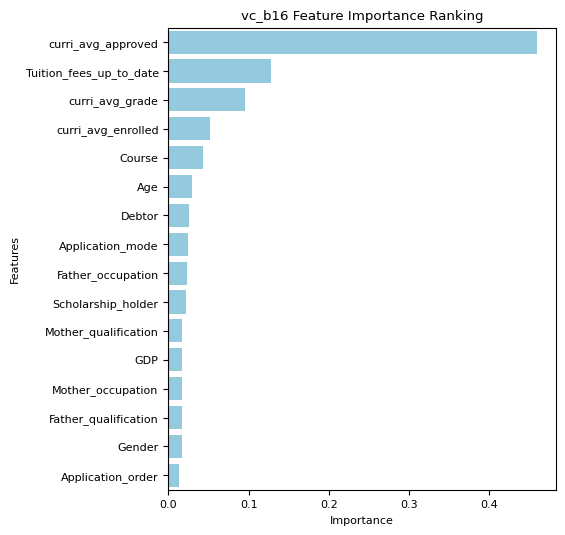

In [168]:
# Plot the ranking of feature importance 
plt.figure(figsize = (5, 6))
sns.barplot(data = imp, x = 'Importance', y = 'Features', color = 'skyblue')
plt.title('vc_b16 Feature Importance Ranking');


The top three most important features are 'curri_avg_approved,' 'Tuition_fees_up_to_date,' and 'curri_avg_grade,' followed by 'curri_avg_enrolled,' 'Course,' and 'Age'. Among these top features, four are academic data, one is socioeconomic data, and one is demographic data. 

Let's see how these features influence whether students drop out or graduate.

In [169]:
# Extract the necessary features from the entire dataset for further analysis.
cols = train_16X.columns.to_list()
cols.append('Target_encoded')

stud = stud_selected.loc[:, cols]
stud['Target_encoded'] = stud['Target_encoded'].replace([0, 1, 2], ['Drop Out', 'Enrolled', 'Graduate'])
stud['Gender'] = stud['Gender'].replace([0, 1], ['Female', 'Male'])
stud['Tuition_fees_up_to_date'] = stud['Tuition_fees_up_to_date'].replace([0, 1], ['No', 'Yes'])
stud.rename(columns = {'Target_encoded': 'Target'}, inplace = True)

# Replace course values with the course name
stud['Course'] = stud['Course'].replace(list(range(1, 18)), ['Biofuel Production Technologies', 'Animation and Multimedia Design', 'Social Service (evening attendance)',
                                                              'Agronomy', 'Communication Design', 'Veterinary Nursing', 'Informatics Engineering', 'Equiniculture',
                                                              'Management', 'Social Service', 'Tourism', 'Nursing', 'Oral Hygiene', 'Advertising and Marketing Management',
                                                              'Journalism and Communication', 'Basic Education', 'Management (evening attendance)'])

We already observed how 'curri_avg_approved' and 'curri_avg_grade' are associated with students' situations ('Dropout', 'Enrolled', or 'Graduate') at the end of the normal course duration during the Exploratory Data Analysis. Now, let's examine the three important curricular units related variables focusing on the two labels, 'Dropout' and 'Graduate', only.

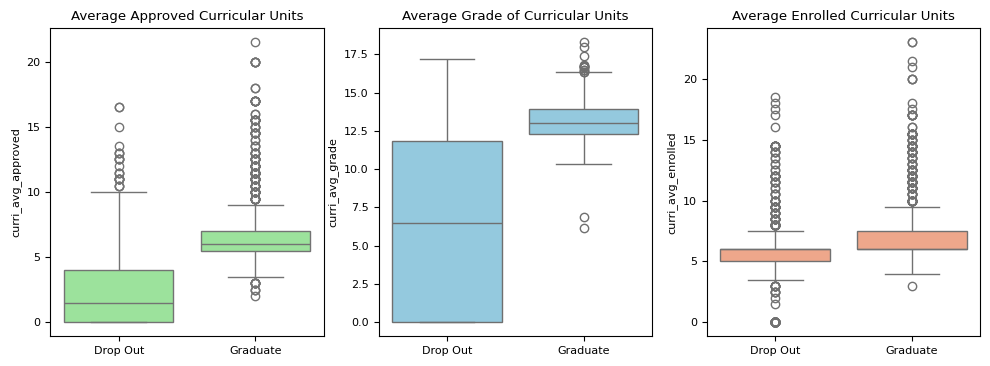

In [170]:
# Plot the three curricular units related variables
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))
sns.boxplot(data = stud.loc[(stud['Target'] == 'Drop Out') | (stud['Target'] == 'Graduate')], x = 'Target', y = 'curri_avg_approved', color = 'lightgreen', ax = ax1)
ax1.set_title('Average Approved Curricular Units')
ax1.set_xlabel("")

sns.boxplot(data = stud.loc[(stud['Target'] == 'Drop Out') | (stud['Target'] == 'Graduate')], x = 'Target', y = 'curri_avg_grade', color = 'skyblue', ax = ax2)
ax2.set_title('Average Grade of Curricular Units')
ax2.set_xlabel("")

sns.boxplot(data = stud.loc[(stud['Target'] == 'Drop Out') | (stud['Target'] == 'Graduate')], x = 'Target', y = 'curri_avg_enrolled', color = 'lightsalmon', ax = ax3)
ax3.set_title('Average Enrolled Curricular Units')
ax3.set_xlabel("");

Students who graduate at the end of the normal duration of the course have much more approved curricular units and much higher average grade in the first and second semester compared to those who drop out.

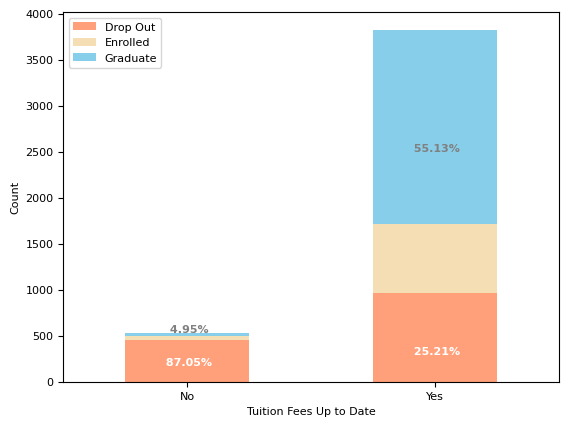

In [171]:
# Create the cross table of 'Tuition_fees_up_to_date' vs. 'Target'
tuition = pd.crosstab(stud['Tuition_fees_up_to_date'], stud['Target'])

# Normalize the cross table to get the percentage
tuition_pct = tuition.div(tuition.sum(1), axis = 0) * 100

# Plot the cross table of 'Tuition_fees_up_to_date' vs. 'Target'
tuition.plot(kind = 'bar', stacked = True, color = ['lightsalmon', 'wheat', 'skyblue'])
plt.legend(title = '')
plt.tick_params(axis = 'x', rotation = 0)
plt.ylabel('Count')
plt.xlabel('Tuition Fees Up to Date')
plt.text(0, 180, f'{tuition_pct.loc['No', 'Drop Out']: .2f}%', ha = 'center', color = 'white', fontweight = 'bold')
plt.text(0, 530, f'{tuition_pct.loc['No', 'Graduate']: .2f}%', ha = 'center', color = 'grey', fontweight = 'bold')
plt.text(1, 300, f'{tuition_pct.loc['Yes', 'Drop Out']: .2f}%', ha = 'center', color = 'white', fontweight = 'bold')
plt.text(1, 2500, f'{tuition_pct.loc['Yes', 'Graduate']: .2f}%', ha = 'center', color = 'grey', fontweight = 'bold');


Students whose tuition fees are not up to date have a very high dropout rate of 87.05% and a very low graduation rate of 4.95%. 

The 'Age' variable ranges from 17 to 70 in the dataset. I will divide it into four age groups and then visualize the dropout rate by age group and gender.

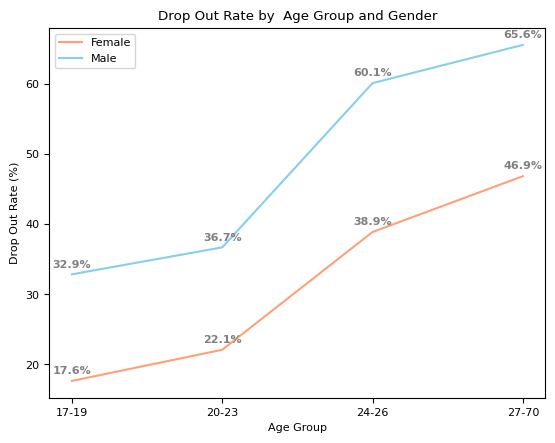

In [172]:
# Create cross tables for different age groups vs. target
age17_19 = pd.crosstab(stud.loc[stud['Age'] < 20]['Gender'], stud.loc[stud['Age'] < 20]['Target'])
age17_19 = age17_19.div(age17_19.sum(1), axis = 0) * 100

age20_23 = pd.crosstab(stud.loc[(stud['Age'] > 19) & (stud['Age'] < 24)]['Gender'], stud.loc[(stud['Age'] > 19) & (stud['Age'] < 24)]['Target'])
age20_23 = age20_23.div(age20_23.sum(1), axis = 0) * 100

age24_26 = pd.crosstab(stud.loc[(stud['Age'] > 23) & (stud['Age'] < 27)]['Gender'], stud.loc[(stud['Age'] > 23) & (stud['Age'] < 27)]['Target'])
age24_26 = age24_26.div(age24_26.sum(1), axis = 0) * 100

age27_70 = pd.crosstab(stud.loc[stud['Age'] > 27]['Gender'], stud.loc[stud['Age'] > 27]['Target'])
age27_70 = age27_70.div(age27_70.sum(1), axis = 0) * 100

# Create a dataframe of Drop Out Rate by Age Group and Gender
age_gen = pd.DataFrame({
    'Age Group': ['17-19', '17-19', '20-23', '20-23', '24-26', '24-26', '27-70', '27-70'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Drop Out Rate (%)': [age17_19.loc['Female', 'Drop Out'], age17_19.loc['Male', 'Drop Out'],
                      age20_23.loc['Female', 'Drop Out'], age20_23.loc['Male', 'Drop Out'],
                      age24_26.loc['Female', 'Drop Out'], age24_26.loc['Male', 'Drop Out'],
                      age27_70.loc['Female', 'Drop Out'], age27_70.loc['Male', 'Drop Out']]
})

# Plot Drop Out Rate by  Age Group and Gende
ax = sns.lineplot(data = age_gen, x = 'Age Group', y = 'Drop Out Rate (%)', hue = 'Gender', palette = ['lightsalmon', 'skyblue'])

for x, y in zip(age_gen['Age Group'], age_gen['Drop Out Rate (%)']):
    ax.text(x, y+1, f'{y:.1f}%', horizontalalignment = 'center', color = 'grey', fontweight = 'bold')

ax.set_title('Drop Out Rate by  Age Group and Gender')
ax.legend(title = '')
plt.show()

The dropout rates of both females and males increase with age, but females consistently have lower dropout rates across all age groups, suggesting that both age and gender are important factors influencing students' likelihood of dropping out.

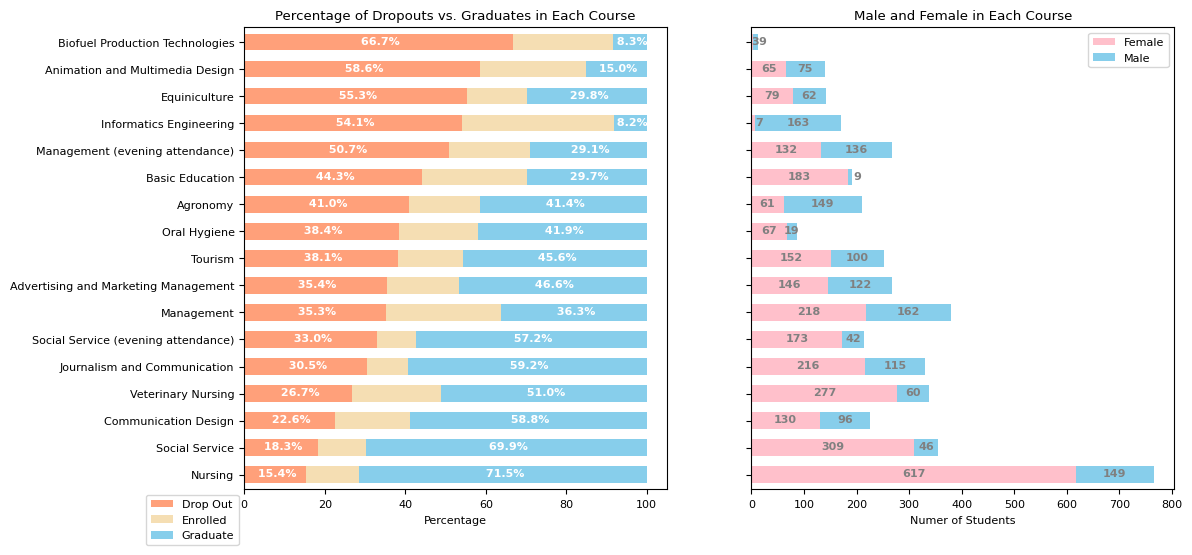

In [173]:
# Create cross table of Course vs. Target 
course = pd.crosstab(stud['Course'], stud['Target'])

# Normalize the table to get percentage
course = course.div(course.sum(1), axis = 0) * 100

# Sort the cross table by 'Drop Out'
course = course.sort_values(by = 'Drop Out')

# Plot percentage of dropouts vs. graduates in each course
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6), sharey = True)

colors = ['lightsalmon', 'wheat', 'skyblue']
course.plot(kind = 'barh', stacked = True, color = colors, width = 0.6, ax = ax1)
ax1.legend(title = '', bbox_to_anchor = (0, 0))
ax1.set_title('Percentage of Dropouts vs. Graduates in Each Course')
ax1.set_xlabel('Percentage')
ax1.set_ylabel('');

# Add percentage labels to the plot
label_1 = list(range(0, 17))
label_3 = list(range(34, 52))
for i, p in enumerate(ax1.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if i in label_1:
        ax1.annotate(f'{width: .1f}%', (x + width/2, y + height/2.5), ha = 'center', color = 'white', fontweight = 'bold')
    elif i in label_3:
        ax1.annotate(f'{width: .1f}%', (x + width/2, y + height/2.5), ha = 'center', color = 'white', fontweight = 'bold')

# Count number of females and males in each course
num_stud = pd.crosstab(stud['Course'], stud['Gender']).reindex(course.index.to_list())

# Plot number of students in each course
num_stud.plot(kind = 'barh', stacked = True, color = ['pink', 'skyblue'], width = 0.6, ax = ax2)
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if width < 10:
        ax2.annotate(f'{int(width)}', (x + width * 2, y + height/2.5), ha = 'center', color = 'grey', fontweight = 'semibold')
    else:
        ax2.annotate(f'{int(width)}', (x + width/2, y + height/2.5), ha = 'center', color = 'grey', fontweight = 'semibold')

ax2.legend(title = '')
ax2.set_ylabel('')
ax2.set_xlabel('Numer of Students')
ax2.set_title('Male and Female in Each Course')

plt.show()

The dropout rates in different courses range from 15.4% to 66.7%. Five out of 17 courses have dropout rates exceeding 50%: 'Biofuel Production Technologies', 'Animation and Multimedia Design', 'Equiniculture', 'Informatics Engineering', 'Management (evening attendance)'.
                  
In this dataset, there are more females than males, leading to a predominance of female students in most courses. However, four courses have more male than female students: 'Biofuel Production Technologies' (3 females, 9 males), 'Animation and Multimedia Design' (65 females, 75 males), 'Informatics Engineering' (7 females, 163 males), and 'Agronomy' (61 females, 149 males). Notably, these four courses, which have a higher proportion of male students, also exhibit high dropout rates. This suggests that gender proportion may influence dropout rates, but it is not the sole factor. While enrollments in different courses vary, the proportions of female and male students also differ, indicating that other factors beyond gender contribute to dropout rates.

**Probability of Dropping Out in the Simulated Dataset**

I will simulate three datasets—'grade,' 'approved,' and 'age'—and predict the probability of dropping out using the final model, 'vc_b16.' This will allow me to see how the values of 'curri_avg_grade' (average grade of curricular units in the 1st and 2nd semesters), 'curri_avg_approved' (average approved curricular units in the 1st and 2nd semesters), and 'Age' (student's age at enrollment) impact the probability of dropping out, while keeping all other features constant (taking the mean for numeric data and the mode for categorical data).

In [174]:
# Simulated dataset -- 'grade'
grade = pd.DataFrame({
    'Application_mode': np.repeat(stud_selected['Application_mode'].mode()[0], 84),
    'Application_order': np.repeat(stud_selected['Application_order'].mode()[0], 84),
    'Course': np.repeat(stud_selected['Course'].mode()[0], 84),
    'Mother_qualification': np.repeat(stud_selected['Mother_qualification'].mode()[0], 84),
    'Father_qualification': np.repeat(stud_selected['Father_qualification'].mode()[0], 84),
    'Mother_occupation': np.repeat(stud_selected['Mother_occupation'].mode()[0], 84),
    'Father_occupation': np.repeat(stud_selected['Father_occupation'].mode()[0], 84),
    'Debtor': np.repeat(stud_selected['Debtor'].mode()[0], 84),
    'Tuition_fees_up_to_date': np.repeat([0, 0, 1, 1], 21),
    'Gender': np.repeat([0, 1, 0, 1], 21),
    'Scholarship_holder': np.repeat(stud_selected['Scholarship_holder'].mode()[0], 84),
    'Age': np.repeat(round(stud_selected['Age'].mean()), 84),
    'GDP': np.repeat(stud_selected['GDP'].mean(), 84),
    'curri_avg_enrolled': np.repeat(round(stud_selected['curri_avg_enrolled'].mean()), 84),
    'curri_avg_approved': np.repeat(round(stud_selected['curri_avg_approved'].mean()), 84),
    'curri_avg_grade': list(range(0, 21)) * 4
})

# Predict drop out probability
grade['dropout_proba'] = vc_b16.predict_proba(grade)[:, 1]

# Modify the table
grade['Gender'] = grade['Gender'].replace([1, 0], ['Male', 'Female'])
grade['Tuition_fees_up_to_date'] = grade['Tuition_fees_up_to_date'].replace([1, 0], ['Tuition_up_to_date', 'Tuition_NOT_up_to_date'])
grade['Gen_Tui'] = grade[['Gender', "Tuition_fees_up_to_date"]].agg('_'.join, axis = 1)

In [175]:
# Simulated dataset -- 'approved'
approved = pd.DataFrame({
    'Application_mode': np.repeat(stud_selected['Application_mode'].mode()[0], 104),
    'Application_order': np.repeat(stud_selected['Application_order'].mode()[0], 104),
    'Course': np.repeat(stud_selected['Course'].mode()[0], 104),
    'Mother_qualification': np.repeat(stud_selected['Mother_qualification'].mode()[0], 104),
    'Father_qualification': np.repeat(stud_selected['Father_qualification'].mode()[0], 104),
    'Mother_occupation': np.repeat(stud_selected['Mother_occupation'].mode()[0], 104),
    'Father_occupation': np.repeat(stud_selected['Father_occupation'].mode()[0], 104),
    'Debtor': np.repeat(stud_selected['Debtor'].mode()[0], 104),
    'Tuition_fees_up_to_date': np.repeat([0, 0, 1, 1], 26),
    'Gender': np.repeat([0, 1, 0, 1], 26),
    'Scholarship_holder': np.repeat(stud_selected['Scholarship_holder'].mode()[0], 104),
    'Age': np.repeat(round(stud_selected['Age'].mean()), 104),
    'GDP': np.repeat(stud_selected['GDP'].mean(), 104),
    'curri_avg_enrolled': np.repeat(round(stud_selected['curri_avg_enrolled'].mean()), 104),
    'curri_avg_approved': list(range(0, 26)) * 4,
    'curri_avg_grade': np.repeat(round(stud_selected['curri_avg_grade'].mean()), 104)
})

# Predict dropout rate
approved['dropout_proba'] = vc_b16.predict_proba(approved)[:, 1]

# Modify the table
approved['Gender'] = approved['Gender'].replace([1, 0], ['Male', 'Female'])
approved['Tuition_fees_up_to_date'] = approved['Tuition_fees_up_to_date'].replace([1, 0], ['Tuition_up_to_date', 'Tuition_NOT_up_to_date'])
approved['Gen_Tui'] = approved[['Gender', "Tuition_fees_up_to_date"]].agg('_'.join, axis = 1)

In [176]:
# Simulated dataset -- 'age'
age = pd.DataFrame({
    'Application_mode': np.repeat(stud_selected['Application_mode'].mode()[0], 216),
    'Application_order': np.repeat(stud_selected['Application_order'].mode()[0], 216),
    'Course': np.repeat(stud_selected['Course'].mode()[0], 216),
    'Mother_qualification': np.repeat(stud_selected['Mother_qualification'].mode()[0], 216),
    'Father_qualification': np.repeat(stud_selected['Father_qualification'].mode()[0], 216),
    'Mother_occupation': np.repeat(stud_selected['Mother_occupation'].mode()[0], 216),
    'Father_occupation': np.repeat(stud_selected['Father_occupation'].mode()[0], 216),
    'Debtor': np.repeat(stud_selected['Debtor'].mode()[0], 216),
    'Tuition_fees_up_to_date': np.repeat([0, 0, 1, 1], 54),
    'Gender': np.repeat([0, 1, 0, 1], 54),
    'Scholarship_holder': np.repeat(stud_selected['Scholarship_holder'].mode()[0], 216),
    'Age': list(range(17, 71)) * 4,
    'GDP': np.repeat(stud_selected['GDP'].mean(), 216),
    'curri_avg_enrolled': np.repeat(round(stud_selected['curri_avg_enrolled'].mean()), 216),
    'curri_avg_approved': np.repeat(round(stud_selected['curri_avg_approved'].mean()), 216),
    'curri_avg_grade': np.repeat(round(stud_selected['curri_avg_grade'].mean()), 216)
})

# Predict dropout rate
age['dropout_proba'] = vc_b16.predict_proba(age)[:, 1]

# Modify the table
age['Gender'] = age['Gender'].replace([1, 0], ['Male', 'Female'])
age['Tuition_fees_up_to_date'] = age['Tuition_fees_up_to_date'].replace([1, 0], ['Tuition_up_to_date', 'Tuition_NOT_up_to_date'])
age['Gen_Tui'] = age[['Gender', "Tuition_fees_up_to_date"]].agg('_'.join, axis = 1)

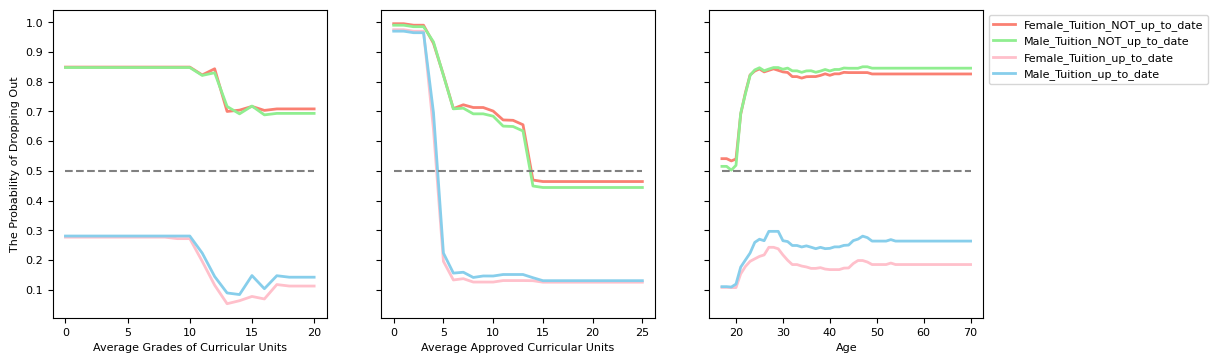

In [177]:
# Plot the probability of dropping out based on the three simulated datasets
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4), sharey = True)
plt.subplots_adjust(wspace = 0.2)
pal = ['salmon', 'lightgreen', 'pink', 'skyblue']

# First plot: 'Average Grades of Curricular Units in 1st and 2nd Semesters'
sns.lineplot(data = grade, x = 'curri_avg_grade', y = 'dropout_proba', hue = 'Gen_Tui', linewidth = 2, palette = pal, legend = False, ax = ax1)
ax1.set_xlabel('Average Grades of Curricular Units')
ax1.set_ylabel('The Probability of Dropping Out')
ax1.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax1.plot(list(range(0,21)), np.repeat(0.5, 21), color = 'grey', linestyle = 'dashed');

# Second plot: 'Average Approved Curricular Units in 1st and 2nd Semesters'
sns.lineplot(data = approved, x = 'curri_avg_approved', y = 'dropout_proba', hue = 'Gen_Tui', linewidth = 2, palette = pal, legend = False, ax = ax2)

ax2.set_xlabel('Average Approved Curricular Units')
ax2.set_ylabel('')
ax2.plot(list(range(0,26)), np.repeat(0.5, 26), color = 'grey', linestyle = 'dashed');

# Third plot: 'Age'
sns.lineplot(data = age, x = 'Age', y = 'dropout_proba', hue = 'Gen_Tui', linewidth = 2, palette = pal, ax = ax3)
ax3.legend(title = '', bbox_to_anchor = (1, 1))
ax3.set_ylabel('')
ax3.plot(list(range(17,71)), np.repeat(0.5, 54), color = 'grey', linestyle = 'dashed');

The probability of dropping out based on the three simulated datasets shows that 'Tuition_fees_up_to_date' plays a vital role in our model 'vc_b16'.

In the first plot, although the probability of dropping out decreases as the average grades of curricular units in the 1st and 2nd semesters increase, students whose tuition fees are up to date always have a probability of dropping out below 0.5, while students whose tuition fees are not up to date consistently have a probability of dropping out above 0.5. 

A similar pattern is observed in the third plot, with the only difference being that students are more likely to drop out as their age at enrollment increases.

In the second plot, the probability of dropping out is almost 1 when a student's average approved curricular units in the 1st and 2nd semesters is below five. If it's above five, students whose tuition fees are up to date have a very low probability of dropping out (below 0.2), while students whose tuition fees are not up to date still have a probability above 0.5 until the average approved curricular units exceed 14.

This raises another question: does a student not paying tuition on time strongly indicate that they are likely to drop out, or does the university deregister students from their courses when they have not paid all the required tuition fees by the specified deadlines? Probably both. But this is beyond our analysis.

Nevertheless, regardless of the tuition fee factor, the plots show clear patterns of drop out probability:

* The probability remains at a high level when the average grade is between 0 and 10, then declines rapidly as the average grade moves from 10 to 13, and finally reaches a plateau again beyond that; 
* There are two sharp decline in the second plot, when the average approved curricular unites exceed 5 or 14;
* The probability remains at a low level when students' age at enrollment is below 20, then increases rapidly as the age moves from 20 to 23, reaching a plateau beyond that.


### Conclusion

**Project Summary and Findings**

In this project, I built a classification model to predict student dropout and academic success in Portugal university. I went through three iterations of model training and evaluation:

* First iteration: Trained a three-class classification model on 21 features.
* Second iteration: Trained a binary classification model on 21 features.
* Third iteration: Trained a binary classification model on 16 features.

Across three iterations, model complexity was reduced, from 21 features to 16 features and from three-class to binary classification, while model performance improved significantly:

* Balanced Accuracy jumped from 0.75 to 0.93 (an increase of 24%)
* F1 Score rose from 0.76 to 0.92 (an increase of 21%)
* AUC increased from 0.91 to 0.96 (an increase of 5%)

From these three iterations, I learned that removing noise -- such as insignificant features and the transitional class ('Enrolled,' in this case, which can transition to 'Dropout' or 'Graduate') -- not only reduces model complexity but also significantly improves model performance, resulting in a simpler and more accurate model.

To examine which factors impact student dropout and how they do so, I visualized the top-ranked features in the final model against the target variable and found that:

* Graduates tend to have significantly higher academic performance, as evidenced by a greater number of approved curricular units and higher grades compared to those who drop out.
* Students with unpaid tuition fees are much more likely to drop out (87.05%) and less likely to graduate (4.95%) compared to those who pay on time (dropout rate: 25.21%, graduation rate: 55.13%).
* Dropout rates increase with age for both females and males; however, females consistently demonstrate lower dropout rates across all age groups.
* Dropout rates in different courses range from 15.4% to 66.7%. Five out of 17 courses have dropout rates exceeding 50%.

I also explored the probability of dropping out in three simulated datasets and discovered that 'Tuition_fees_up_to_date' plays a vital role in our final model, 'vc_b16': students whose tuition fees are NOT up to date exhibited a significantly higher dropout probability, consistently exceeding 0.5 in all simulated scenarios.

I’m not sure if a student's failure to pay tuition on time strongly indicates that they are likely to drop out, or if the university deregisters students from their courses when they have not paid all the required tuition fees by the specified deadlines. Nevertheless, regardless of the tuition fee factor, the patterns of dropout probability is clear in the simulated datasets:  

* The probability declines rapidly as the average grade moves from 10 to 13 or when the average approved curricular units exceed 5 and 14.
* The probability increases rapidly as age at enrollment moves from 20 to 23.

This suggests that students who fit these profiles may need more support to avoid dropping out:  

* Tuition fees not up to date;
* Average grade in the 1st and 2nd semesters is below 10;
* Average approved curricular units in the 1st and 2nd semesters are below 14, especially below 5;
* Age at enrollment is over 23.

In addition, under the same circumstances, male students and those enrolled in courses with high dropout rates (over 50%) also require more support.

**Deficiencies and Future Research**

What I didn’t do well in this project was handling multi-class categorical data. There are 10 multi-class variables, most of which have high cardinality, very uneven category distribution, and no inherent order among the categories. I experimented with three feature encoding methods —- Frequency Encoding, K-fold Target Encoding, and sorting categories by their principal component scores —- alongside the original label encoding, resulting in four models with different feature encoding methods, and compared their performance. The results were very similar across all methods. After examining the permutation importance of features in the Random Forest model I used to compare different feature encoding results, I found that all multi-class variables scored either negatively or close to zero, suggesting that these features are not important. I believe this explains why different encoding methods for the multi-class variables did not significantly affect model performance. However, I didn’t remove all the multi-class variables, as the model was not yet optimal, and the feature importance ranking might have been biased. After three iterations of model training, some of the multi-class variables remained in the final model.

I tried to understand how these variables impact student dropout but couldn’t identify a clear pattern. The highest dropout rate sometimes occurs in the 'Unknown' category. Additionally, some variables have too many categories and I lack the domain knowledge and local experience in Portugal to group them or establish an order. Consequently, I skipped the analysis of most multi-class variables against the target variables.  

In future research, if domain knowledge can be leveraged to group or sort these categories, or if new techniques are employed to uncover patterns in how multi-class variables relate to student dropout and academic success, new insights could emerge.


